# Data Analysis Project: [E-Commerce Public Dataset]
- **Name:** Fadiyah Nazihfa Ukhti
- **Dataset:** Dicoding Indonesia

## Business Questions
- Question 1: How has E-Commerce's sales and revenue performance been in the last few months?
- Question 2: Which product categories sell the most and least?
- Question 3: How is the geographical distribution of customers and sellers in E-Commerce?
- Question 4: Which state sellers contribute the most to sales?
- Question 5: When was the last time the customer made a transaction?
- Question 6: How often has a customer made a purchase in the last few months?
- Question 7: How much money have customers spent in the last few months?

## Import Packages/Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

## Data Wrangling

### Gathering Data

#### ```customers_df```

In [2]:
customers_df = pd.read_csv("E-Commerce_Public_Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### ```geolocation_df```

In [3]:
geolocation_df = pd.read_csv("E-Commerce_Public_Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### ```order_items_df```

In [4]:
order_items_df = pd.read_csv("E-Commerce_Public_Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### ```order_payments_df```

In [5]:
order_payments_df = pd.read_csv("E-Commerce_Public_Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### ```order_reviews_df```

In [6]:
order_reviews_df = pd.read_csv("E-Commerce_Public_Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### ```orders_df```

In [7]:
orders_df = pd.read_csv("E-Commerce_Public_Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### ```product_category_name_translation_df```

In [8]:
product_category_name_translation_df = pd.read_csv("E-Commerce_Public_Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### ```products_df```

In [9]:
products_df = pd.read_csv("E-Commerce_Public_Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Based on the table above, it can be observed that product category names need to be adjusted to English.

In [10]:
# Merge product_category_name_translation & products_dataset
product_translation_merged_df = products_df.merge(product_category_name_translation_df, on="product_category_name", how="left")
product_translation_merged_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [11]:
# Update product category name with english
product_translation_merged_df["product_category_name"] = product_translation_merged_df["product_category_name_english"].combine_first(product_translation_merged_df["product_category_name"])
product_translation_merged_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [12]:
# Displaying product data after updating
products_translation_df = product_translation_merged_df[["product_id","product_category_name","product_name_lenght","product_description_lenght","product_photos_qty","product_weight_g","product_length_cm","product_height_cm","product_width_cm"]]
products_translation_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The product data that will be used is product_translation_df, which is a merged table of the product_category_name_translation_df and products_df tables.

#### ```sellers_df```

In [13]:
sellers_df = pd.read_csv("E-Commerce_Public_Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Result Gathering Data**
- customers_df
- geolocation_df
- order_items_df
- order_payments_df
- order_reviews_df
- orders_df
- product_translation_df
- sellers_df

### Assessing Data

#### Assess table ```customers.df```

In [14]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


There are no anomalies in the amount of data and data types.

In [16]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


There are no missing values.

In [17]:
print("Number of duplicates: ", customers_df.duplicated().sum())

Number of duplicates:  0


In [18]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


The customer_id column is unique.

#### Assess table ```geolocation_df```

In [19]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


There are no anomalies in the amount of data and data types.

In [21]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


There are no missing values.

In [22]:
print("Number of duplicates: ", geolocation_df.duplicated().sum())

Number of duplicates:  261831


In [23]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


#### Assess table ```order_items_df```

In [24]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


There are no anomalies in the amount of data. However, there is a data type error in the shipping_limit_date column. The data type of the shipping_limit_date column should be datetime.

In [26]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


There are no missing values.

In [27]:
print("Number of duplicates: ", order_items_df.duplicated().sum())

Number of duplicates:  0


In [28]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### Assess table ```order_payments_df```

In [29]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [30]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


There are no anomalies in the amount of data and data types.

In [31]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


There are no missing values.

In [32]:
print("Number of duplicates: ", order_payments_df.duplicated().sum())

Number of duplicates:  0


In [33]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### Assess table ```order_reviews_df```

In [34]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [35]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


There are inconsistencies in the amount of data in the review_comment_title and review_comment_message columns. Additionally, there are data type errors in the review_creation_date and review_answer_timestamp columns. The data type of the review_creation_date and review_answer_timestamp columns should be datetime.

In [36]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


The review_comment_title column contains 87656 missing values and the review_comment_message column contains 58247 missing values.

In [37]:
print("Number of duplicates: ", order_reviews_df.duplicated().sum())

Number of duplicates:  0


In [38]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


The order_id column is not unique. It seems that a customer reviews more than once for the same order_id.

#### Assess table ```orders_df```

In [39]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


There are inconsistencies in the amount of data in the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date columns. Additionally, there are data type errors in the order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date columns, which should have a datetime data type.

In [41]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


The order_approved_at column contains 160 missing values, the order_delivered_carrier_date column contains 1783 missing values, and the order_delivered_customer_date column contains 2965 missing values.

In [42]:
print("Number of duplicates: ", orders_df.duplicated().sum())

Number of duplicates:  0


In [43]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


The order_id column is unique.

#### Assess table ```product_translation_df```

In [44]:
products_translation_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


There are inconsistencies in the amount of data

In [46]:
products_translation_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


There are 610 missing values in the product_category_name, product_name_length, product_description_length, and product_photos_qty columns. Additionally, there are 2 missing values in the product_weight_g, product_length_cm, product_height_cm, and product_width_cm columns.

In [47]:
print("Number of duplicates: ", products_translation_df.duplicated().sum())

Number of duplicates:  0


In [48]:
products_translation_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


The product_id column is unique.

#### Assess table ```sellers_df```

In [49]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [50]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


There are no anomalies in the amount of data and data types.

In [51]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


There are no missing values.

In [52]:
print("Number of duplicates: ", sellers_df.duplicated().sum())

Number of duplicates:  0


In [53]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


The seller_id column is unique.

**Result Assesing Data**

```customers_df```
- There are no anomalies in the amount of data and data types

```geolocation_df```
- There are 261831 duplicate data

```order_items_df```
- There is a data type error in the shipping_limit_date column

```order_payments_df```
- There are no anomalies in the amount of data and data types

```order_reviews_df```
- There are data type errors in the review_creation_date and review_answer_timestamp columns
- The review_comment_title column contains 87656 missing values and the review_comment_message column contains 58247 missing values
- Validate whether there is an order_id that is reviewed more than once

```orders_df```
- There are data type errors in the order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, and order_estimated_delivery_date columns.
- The order_approved_at column contains 160 missing values, the order_delivered_carrier_date column contains 1783 missing values, and the order_delivered_customer_date column contains 2965 missing values.

```products_translation_df```
- There are 610 missing values in the product_category_name, product_name_lenght, product_description_lenght, and product_photos_qty columns
- There are 2 missing values in the product_weight_g, product_length_cm, product_height_cm, and product_width_cm columns

```sellers_df```
- There are no anomalies in the amount of data and data types.

### Cleaning Data

#### Cleaning Table ```geolocation_df```

##### Duplicate Data

In [54]:
print(geolocation_df.duplicated().sum())

261831


In [55]:
geolocation_df.drop_duplicates(inplace=True)

In [56]:
print(geolocation_df.duplicated().sum())

0


#### Cleaning Table ```order_items_df```

##### Data Type

In [57]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [58]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"]).dt.normalize()

In [59]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [60]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 02:28:41.480692480,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:00:00,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 00:00:00,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 00:00:00,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 00:00:00,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 00:00:00,6735.000000,409.680000


#### Cleaning Table ```order_reviews_df```

##### Data Type

In [61]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [62]:
datetime_columns_review = ["review_creation_date","review_answer_timestamp"]

for column in datetime_columns_review:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column]).dt.normalize()

In [63]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### Missing Values

In [64]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [65]:
missing_values_review = order_reviews_df[(order_reviews_df['review_comment_title'].isna()) | (order_reviews_df['review_comment_message'].isna())]
print(missing_values_review)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

The review_comment_title and review_comment_message columns are subjective and cannot be explored further, so both columns will be removed.

In [66]:
order_reviews_df = order_reviews_df.drop(columns=['review_comment_title','review_comment_message'])
print(order_reviews_df)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_creation_date review_answer_timestamp  
0       

In [67]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,NaN,NaN
freq,3,3,NaN,NaN,NaN
mean,NaN,NaN,4.086421,2018-01-12 20:49:20.864307200,2018-01-15 10:47:48.854309376
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 00:00:00
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 00:00:00
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-04 00:00:00
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 00:00:00
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 00:00:00


The order_id column is not unique. It seems that a customer reviews more than once for the same order_id.

In [68]:
order_reviews_df[order_reviews_df.order_id.duplicated()]

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,2017-11-07,2017-11-10
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,2018-01-18,2018-01-18
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,2018-03-23,2018-03-24
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,2017-10-21,2017-10-22
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,2017-09-14,2017-09-17
...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,2018-02-17,2018-02-19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,2017-07-03,2017-07-05
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,2018-03-03,2018-03-04
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,2017-05-24,2017-05-24


There are some order_id that are reviewed more than once. It appears that customers have changed their reviews.

In [69]:
order_reviews_df[order_reviews_df['order_id']=='a7dbcf5043158d6fa72859eead2f3d10']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
30653,4b260124c37fa1631a516b19eeee2558,a7dbcf5043158d6fa72859eead2f3d10,5,2017-05-23,2017-05-24
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,2017-05-24,2017-05-24


As seen in the table above, there are 2 reviews for order_id = 'a7dbcf5043158d6fa72859eead2f3d10'. On 2017-05-23, the order_id received a review_score = 5 then updated on 2017-05-24 to review_score = 4

In [70]:
# Sort data by order_id and review_answer_timestamp
order_reviews_df.sort_values(by=['order_id', 'review_answer_timestamp'], ascending=[True, False], inplace=True)

# Drop duplicate order_id and keep latest review
latest_reviews_df = order_reviews_df.drop_duplicates(subset='order_id', keep='first')

In [71]:
# Check
latest_reviews_df[latest_reviews_df['order_id']=='a7dbcf5043158d6fa72859eead2f3d10']

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
30653,4b260124c37fa1631a516b19eeee2558,a7dbcf5043158d6fa72859eead2f3d10,5,2017-05-23,2017-05-24


In [72]:
latest_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,98673,98673,98673.000000,98673,98673
unique,98110,98673,NaN,NaN,NaN
top,69a1068c3128a14994e3e422e4539e04,00010242fe8c5a6d1ba2dd792cb16214,NaN,NaN,NaN
freq,3,1,NaN,NaN,NaN
mean,NaN,NaN,4.086437,2018-01-13 04:42:20.609893120,2018-01-15 18:45:40.907847168
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 00:00:00
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 00:00:00
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 00:00:00
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 00:00:00
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 00:00:00


The order_id column is unique

#### Cleaning Table ```orders_df```

##### Data Type

In [73]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [74]:
datetime_columns_orders = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in datetime_columns_orders:
    orders_df[column] = pd.to_datetime(orders_df[column]).dt.normalize()

In [75]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [76]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 17:26:56.616888320,2017-12-31 05:20:33.553248256,2018-01-04 06:13:53.848737536,2018-01-13 19:24:32.449106432,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 00:00:00,2016-09-15 00:00:00,2016-10-08 00:00:00,2016-10-11 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 00:00:00,2017-09-12 00:00:00,2017-09-15 00:00:00,2017-09-25 00:00:00,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 00:00:00,2018-01-19 00:00:00,2018-01-24 00:00:00,2018-02-02 00:00:00,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 00:00:00,2018-05-04 00:00:00,2018-05-08 00:00:00,2018-05-15 00:00:00,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 00:00:00,2018-09-03 00:00:00,2018-09-11 00:00:00,2018-10-17 00:00:00,2018-11-12 00:00:00


##### Missing Values

In [77]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [78]:
# Check missing values in 'order_approved_at' column
print(orders_df[(orders_df['order_approved_at'].isna())])

                               order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      

In [79]:
# Check missing values in 'order_delivered_carrier_date' column
print(orders_df[orders_df['order_delivered_carrier_date'].isna()])

                               order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
266    8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
324    d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp order_approved_at  \
6         

In [80]:
# Check missing values in 'order_delivered_customer_date' column
print(orders_df[orders_df['order_delivered_customer_date'].isna()])

                               order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp order_approved_at  \
6         

In [81]:
print(orders_df['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Missing values in the order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date columns are caused by the order_status still being processed. These columns will be removed because they are not really needed for the next analysis stage.

In [82]:
orders_df = orders_df.drop(columns=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'])
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-26


#### Cleaning Table ```products_translation_df```

##### Missing Values

In [83]:
products_translation_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [84]:
# Check Missing Values
print(products_translation_df[(products_translation_df['product_category_name'].isna()) |
                              (products_translation_df['product_name_lenght'].isna()) |
                              (products_translation_df['product_description_lenght'].isna()) |
                              (products_translation_df['product_photos_qty'].isna())
                              ])

                             product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN         

In [85]:
# Check Missing Values
print(products_translation_df[(products_translation_df['product_weight_g'].isna()) |
                              (products_translation_df['product_length_cm'].isna()) |
                              (products_translation_df['product_height_cm'].isna()) |
                              (products_translation_df['product_width_cm'].isna())
                              ])

                             product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                  baby   
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
8578                  60.0                       865.0                 3.0   
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN  


In [86]:
products_translation_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


The product_name_lenght, product_description_lenght, and product_photos_qty columns will be removed as they are not needed in the next analysis stage.

In [87]:
products_translation_df = products_translation_df.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty'])
print(products_translation_df)

                             product_id      product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                  perfumery   
1      3aa071139cb16b67ca9e5dea641aaa2f                        art   
2      96bd76ec8810374ed1b65e291975717f             sports_leisure   
3      cef67bcfe19066a932b7673e239eb23d                       baby   
4      9dc1a7de274444849c219cff195d0b71                 housewares   
...                                 ...                        ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0            furniture_decor   
32947  bf4538d88321d0fd4412a93c974510e6  construction_tools_lights   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c             bed_bath_table   
32949  83808703fc0706a22e264b9d75f04a2e      computers_accessories   
32950  106392145fca363410d287a815be6de4             bed_bath_table   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0      

In [88]:
# Check count of each product_category_name
products_translation_df.product_category_name.value_counts()

,count
product_category_name,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
fashion_childrens_clothes,5
home_comfort_2,5
pc_gamer,3


In [89]:
products_translation_df.isna().sum()

,0
product_id,0
product_category_name,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Products that have empty category name will be filled with the value 'not defined'.

In [90]:
products_translation_df['product_category_name'] = products_translation_df['product_category_name'].fillna(value="not_defined")

In [91]:
products_translation_df[products_translation_df['product_category_name']=="not_defined"]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,not_defined,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,not_defined,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,not_defined,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,not_defined,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,not_defined,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,not_defined,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,not_defined,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,not_defined,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,not_defined,1300.0,45.0,16.0,45.0


In [92]:
products_translation_df.isna().sum()

,0
product_id,0
product_category_name,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [93]:
# Check Missing Values
print(products_translation_df[(products_translation_df['product_weight_g'].isna()) |
                              (products_translation_df['product_length_cm'].isna()) |
                              (products_translation_df['product_height_cm'].isna()) |
                              (products_translation_df['product_width_cm'].isna())
                              ])

                             product_id product_category_name  \
8578   09ff539a621711667c43eba6a3bd8466                  baby   
18851  5eb564652db742ff8f28759cd8d2652a           not_defined   

       product_weight_g  product_length_cm  product_height_cm  \
8578                NaN                NaN                NaN   
18851               NaN                NaN                NaN   

       product_width_cm  
8578                NaN  
18851               NaN  


Missing values in the product_weight_g, product_length_cm, product_height_cm, and product_width_cm columns will be filled with the value 0.

In [94]:
products_translation_df.fillna({
    'product_weight_g': 0.0,
    'product_length_cm': 0.0,
    'product_height_cm': 0.0,
    'product_width_cm': 0.0
}, inplace=True)

In [95]:
products_translation_df.isna().sum()

,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [96]:
# Check Missing Values
print(products_translation_df[(products_translation_df['product_weight_g'].isna()) |
                              (products_translation_df['product_length_cm'].isna()) |
                              (products_translation_df['product_height_cm'].isna()) |
                              (products_translation_df['product_width_cm'].isna())
                              ])

Empty DataFrame
Columns: [product_id, product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


Tables to be explored:
- geolocation_df
- customers_df
- sellers_df
- orders_df
- order_items_df
- products_translation_df
- order_payments_df
- latest_reviews_df

## Exploratory Data Analysis (EDA)

### Explore ```geolocation_df```

In [97]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
576680,32667,-19.972386,-44.138457,betim,MG
381332,18087,-23.439736,-47.387487,sorocaba,SP
152573,6150,-23.565961,-46.816539,osasco,SP
919278,88904,-28.948862,-49.499817,ararangua,SC
72097,4069,-23.624220,-46.648252,são paulo,SP


In [98]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


There are 738332 geolocation data, where the largest city geographic location is Sao Paulo and the largest state geographic location is SP.

### Explore ```customers_df```

In [99]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
63272,65087f2ecd86296752c17be69496a9d1,2a32808072365c90275fccd0fff8b051,21061,rio de janeiro,RJ
37690,62082173db63a1a735d81f64754914e4,6424423121df7517efd1fa700283c47f,39480,januaria,MG
88646,c0fe767fcab876d0056471c18e1b01f2,ca696d23b3579bedb6b1623aa9dadf57,65485,itapecuru mirim,MA
35436,d5b6785ad0858259574a16b9a577d5be,238f93c333a6fd8d79b8d9a5364e4208,13082,campinas,SP
75508,e470e314e6a0a2c4047969fe6e787eed,577b248d5f425930ca27a980977bbdcf,95555,capao da canoa,RS


##### Distribution of number of customers by city and state

In [100]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [101]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Based on the results above, it can be observed that most customers are located in the states of SP, RJ, and MG. Furthermore, the majority of customers are in the city of São Paulo.

##### Merge geolocation_df & customers_df

In [102]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Based on the results above, it can be seen that the same geolocation postal code can have different latitude and longitude.

In [103]:
# Average latitude and longitude for the same zip code
geolocation_avg_df = geolocation_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

In [104]:
# Merge customers_df & geolocation_avg_df
geolocation_customers_df = pd.merge(
    left=customers_df,
    right=geolocation_avg_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)
geolocation_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409.0,-20.499273,-47.396658
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,9790.0,-23.728396,-46.542250
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1151.0,-23.531309,-46.656690
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,8775.0,-23.500670,-46.186348
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,13056.0,-22.975708,-47.143140


In [105]:
geolocation_customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,99441,99441,99441.000000,99441,99441,99163.000000,99163.000000,99163.000000
unique,99441,96096,NaN,4119,27,NaN,NaN,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,NaN,NaN,NaN
freq,1,17,NaN,15540,41746,NaN,NaN,NaN
mean,NaN,NaN,35137.474583,NaN,NaN,35057.887176,-21.190884,-46.175539
std,NaN,NaN,29797.938996,NaN,NaN,29784.314664,5.609013,4.056745
min,NaN,NaN,1003.000000,NaN,NaN,1003.000000,-33.689890,-72.668821
25%,NaN,NaN,11347.000000,NaN,NaN,11320.000000,-23.589417,-48.097915
50%,NaN,NaN,24416.000000,NaN,NaN,24350.000000,-22.924854,-46.630414
75%,NaN,NaN,58900.000000,NaN,NaN,58406.500000,-20.139309,-43.597342


### Explore ```sellers_df```

In [106]:
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2710,403aa86912527d730337ffcb0fb096ab,30220,belo horizonte,MG
1374,06e5eefc71ec47ae763c5c6f8db7064f,91350,porto alegre,RS
487,5bc24d989e71e93c33e50a7782431b0e,37165,campo do meio,MG
2211,cf6f6bc4df3999b9c6440f124fb2f687,4937,sao paulo,SP
1512,b3f19518fcec265b2e97af287725f981,15170,tanabi,SP


##### Distribution of the number of sellers by city and state

In [107]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


In [108]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Based on the results above, it can be observed that most sellers are located in the state of SP, with a total of 1849 sellers. Additionally, the highest number of sellers is in the city of São Paulo, totaling 694.

### Explore ```orders_df```

In [109]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
51643,69ae6d6493cb6b0420c6e86da2cc3c3f,1693bc6668a6e89a390b6f20f86b6825,delivered,2018-05-14,2018-05-29
49621,108f58a6439933a88e7950ee7b46ec11,13bbb5ef6f8db9469c6bbc69d9542872,delivered,2018-05-10,2018-06-04
28391,5e11fe9f9a64d664e12cf549745060e0,44a838eb7c573fe810820c3f440bf4f0,delivered,2017-04-10,2017-05-04
93109,db7c1adfe423878e28b1e27431efb880,44db6a0342dae03009f4b1115b24d9c6,delivered,2018-01-18,2018-02-15
71022,81197e2ef0c78f09e8ffd8a87efaf57b,243e878db91f17c94ef54a3338315e1e,delivered,2017-11-27,2018-01-10


In [110]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [111]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN
freq,1,1,96478,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 17:26:56.616888320,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 00:00:00,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 00:00:00,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 00:00:00,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 00:00:00,2018-11-12 00:00:00


### Explore ```order_items_df```

In [112]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
38467,575ca88a26f8e32bb7691d172640bbb6,1,8100d323ffa1909cfcf9fdf05f20b678,f8db351d8c4c4c22c6835c19a46f01b0,2018-01-17,149.9,38.60
39884,5ac3fcbc8dcadd9d700bd4dea8aca74d,1,461f43be3bdf8844e65b62d9ac2c7a5a,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-09,121.9,51.35
91479,cf8c5625d28a00a4d93cb05f30a0eead,1,8f3e68cbfd56c030ceed9696c2e78620,23613d49c3ac2bd302259e55c06c050c,2018-01-11,249.9,191.72
82728,bbe9cd550cedc72e9c9ea15fe13bb91b,1,0b039b61011417822882815943f13dac,8b321bb669392f5163d04c59e235e066,2018-03-23,23.7,8.29
14059,2001c0c8545591add8b8dbb31c36c30a,1,bb90206fa281c20f0b4c42a2393b54dd,e9bc59e7b60fc3063eb2290deda4cced,2017-07-18,195.9,14.39


In [113]:
order_items_df.groupby(by="seller_id").agg({
    "order_id": "nunique",
}).sort_values(by="order_id", ascending=False)

,order_id
seller_id,
6560211a19b47992c3666cc44a7e94c0,1854
4a3ca9315b744ce9f8e9374361493884,1806
cc419e0650a3c5ba77189a1882b7556a,1706
1f50f920176fa81dab994f9023523100,1404
da8622b14eb17ae2831f4ac5b9dab84a,1314
...,...
ceb7b4fb9401cd378de7886317ad1b47,1
cecd97bc34ed8330bd4cd15713eda670,1
5b92bfa4120daa27c574daa2e386c693,1


Seller with id = '6560211a19b47992c3666cc44a7e94c0' received the highest number of orders, totaling 1854 orders.

### Explore ```products_translation_df```

In [114]:
products_translation_df.describe(include='all')

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN
mean,NaN,NaN,2276.334315,30.813207,16.936633,23.195320
std,NaN,NaN,4281.945502,16.915648,13.637779,12.080033
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,1900.000000,38.000000,21.000000,30.000000


In [115]:
products_translation_df.sample(5)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6569,2e0d7a0a2e12fb5ff71b53c36e0ccb1a,home_confort,5700.0,40.0,20.0,40.0
4498,b85d127ab2f470f523f1678b7f399cef,housewares,150.0,20.0,2.0,20.0
13085,242e1933d9cb1c789d3c6a3f2d083ba0,toys,8975.0,60.0,48.0,17.0
20737,937a79a60a40809f6e8451355f21d639,perfumery,100.0,16.0,5.0,11.0
8321,b47f7c9903cbd0bed2968a1b4cd21ed6,garden_tools,2900.0,17.0,26.0,27.0


In [116]:
products_translation_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
}).sort_values(by="product_id", ascending=False)

,product_id
product_category_name,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
home_comfort_2,5
fashion_childrens_clothes,5
pc_gamer,3


The product category with the highest number of products is bed_bath_table, with a total of 3029 products.

##### Merge order_items_df & products_translation_df

In [117]:
products_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32951 non-null  float64
 3   product_length_cm      32951 non-null  float64
 4   product_height_cm      32951 non-null  float64
 5   product_width_cm       32951 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [118]:
products_translation_df.isna().sum()

,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [119]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [120]:
# Merge order_items_df & products_translation_df
product_order_items_df = pd.merge(
    left=products_translation_df,
    right=order_items_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_order_items_df.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17,37.90,8.29


In [121]:
product_order_items_df.isna().sum()

,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
order_id,0
order_item_id,0
seller_id,0
shipping_limit_date,0


In [122]:
product_order_items_df.describe(include='all')

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650,112650.000000,112650,112650,112650.000000,112650.000000
unique,32951,74,NaN,NaN,NaN,NaN,98666,NaN,3095,NaN,NaN,NaN
top,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,NaN,NaN,NaN,NaN,8272b63d03f5f79c56e9e4120aec44ef,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,527,11115,NaN,NaN,NaN,NaN,21,NaN,2033,NaN,NaN,NaN
mean,NaN,NaN,2093.337506,30.148850,16.591114,22.992872,NaN,1.197834,NaN,2018-01-07 02:28:41.480692224,120.653739,19.990320
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,2016-09-19 00:00:00,0.850000,0.000000
25%,NaN,NaN,300.000000,18.000000,8.000000,15.000000,NaN,1.000000,NaN,2017-09-20 00:00:00,39.900000,13.080000
50%,NaN,NaN,700.000000,25.000000,13.000000,20.000000,NaN,1.000000,NaN,2018-01-26 00:00:00,74.990000,16.260000
75%,NaN,NaN,1800.000000,38.000000,20.000000,30.000000,NaN,1.000000,NaN,2018-05-10 00:00:00,134.900000,21.150000
max,NaN,NaN,40425.000000,105.000000,105.000000,118.000000,NaN,21.000000,NaN,2020-04-09 00:00:00,6735.000000,409.680000


In [123]:
product_order_items_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
20528,489ae2aa008f021502940f251d4cce7f,housewares,30000.0,60.0,61.0,33.0,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16,6735.00,194.31
73922,69c590f7ffc7bf8db97190b6cb6ed62e,computers,5660.0,54.0,18.0,47.0,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02,6729.00,193.21
49503,1bdf5e6731585cf01aa8169c7028d6ad,art,7400.0,47.0,25.0,25.0,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15,6499.00,227.66
71835,a6492cc69376c469ab6f61d8f44de961,small_appliances,22600.0,55.0,40.0,40.0,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18,4799.00,151.34
32232,c3ed642d592594bb648ff4a04cee2747,small_appliances,30000.0,50.0,49.0,50.0,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09,4690.00,74.34
...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,health_beauty,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21,1.20,7.89
55903,05b515fdc76e888aada3c6d66c201dff,health_beauty,800.0,21.0,4.0,15.0,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21,1.20,7.89
29610,8a3254bee785a526d548a81a9bc3c9be,construction_tools_construction,200.0,16.0,4.0,11.0,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07,0.85,22.30
29608,8a3254bee785a526d548a81a9bc3c9be,construction_tools_construction,200.0,16.0,4.0,11.0,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04,0.85,18.23


It can be observed that the most expensive product is in the housewares category, while the cheapest product is in the construction_tools_construction category.

In [124]:
product_order_items_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price":  ["min", "max"]
}).sort_values(by=("price", "max"), ascending=False)

product_id   price         
                             nunique     min      max
product_category_name                                
housewares                      2335    3.06  6735.00
computers                         30   34.50  6729.00
art                               55    3.50  6499.00
small_appliances                 231    6.50  4799.00
musical_instruments              289    4.90  4399.87
...                              ...     ...      ...
security_and_services              2  100.00   183.29
diapers_and_hygiene               12   25.00   139.89
fashion_childrens_clothes          5   39.99   110.00
flowers                           14   15.60    65.90
cds_dvds_musicals                  1   45.00    65.00

[74 rows x 3 columns]

In [125]:
product_order_items_df.groupby(by="product_category_name").agg({
    "product_id": "nunique",
    "price":  ["min", "max"]
}).sort_values(by=("price", "min"), ascending=True)

product_id   price         
                                     nunique     min      max
product_category_name                                        
construction_tools_construction          400    0.85  2300.00
health_beauty                           2444    1.20  3124.00
stationery                               849    2.29  1693.00
pet_shop                                 719    2.90  2498.00
not_defined                              610    3.00  3980.00
...                                      ...     ...      ...
fashion_childrens_clothes                  5   39.99   110.00
furniture_mattress_and_upholstery         10   44.70   399.99
cds_dvds_musicals                          1   45.00    65.00
security_and_services                      2  100.00   183.29
pc_gamer                                   3  129.99   239.00

[74 rows x 3 columns]

In [126]:
product_order_items_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
}).sort_values(by="order_id", ascending=False)

,order_id
product_category_name,
bed_bath_table,9417
health_beauty,8836
sports_leisure,7720
computers_accessories,6689
furniture_decor,6449
...,...
la_cuisine,13
cds_dvds_musicals,12
pc_gamer,8


The most ordered product category is bed_bath_table, with a total of 9417 orders.

In [127]:
# Product correlation
product_price_freight = pd.DataFrame(product_order_items_df[['price','product_weight_g','product_length_cm','product_height_cm','product_width_cm','freight_value']])
product_price_freight.corr(numeric_only=True)

,price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,freight_value
price,1.000000,0.338649,0.145676,0.223455,0.172305,0.414204
product_weight_g,0.338649,1.000000,0.460946,0.583302,0.506616,0.610424
product_length_cm,0.145676,0.460946,1.000000,0.193186,0.532810,0.309085
product_height_cm,0.223455,0.583302,0.193186,1.000000,0.281491,0.391837
product_width_cm,0.172305,0.506616,0.532810,0.281491,1.000000,0.323767
freight_value,0.414204,0.610424,0.309085,0.391837,0.323767,1.000000


Text(0.5, 1.0, 'Heatmap Correlation')

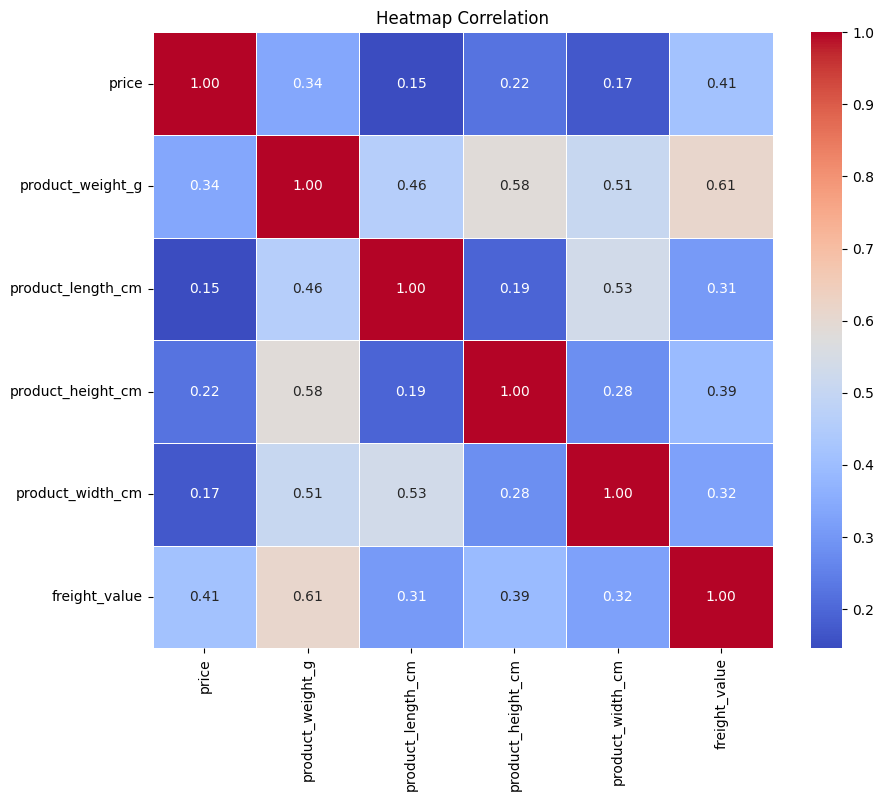

In [128]:
correlation_matrix = product_price_freight.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Correlation')

Based on the data above, it can be seen that these columns exhibit a positive correlation. It can also be observed that the product_weight_g and freight_value columns have a relatively strong correlation of 0.61.

In [129]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
count,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN
freq,1,1,96478,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 17:26:56.616888320,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 00:00:00,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 00:00:00,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 00:00:00,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 00:00:00,2018-11-12 00:00:00


In [130]:
product_order_items_df.describe(include='all')

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650,112650.000000,112650,112650,112650.000000,112650.000000
unique,32951,74,NaN,NaN,NaN,NaN,98666,NaN,3095,NaN,NaN,NaN
top,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,NaN,NaN,NaN,NaN,8272b63d03f5f79c56e9e4120aec44ef,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,527,11115,NaN,NaN,NaN,NaN,21,NaN,2033,NaN,NaN,NaN
mean,NaN,NaN,2093.337506,30.148850,16.591114,22.992872,NaN,1.197834,NaN,2018-01-07 02:28:41.480692224,120.653739,19.990320
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,2016-09-19 00:00:00,0.850000,0.000000
25%,NaN,NaN,300.000000,18.000000,8.000000,15.000000,NaN,1.000000,NaN,2017-09-20 00:00:00,39.900000,13.080000
50%,NaN,NaN,700.000000,25.000000,13.000000,20.000000,NaN,1.000000,NaN,2018-01-26 00:00:00,74.990000,16.260000
75%,NaN,NaN,1800.000000,38.000000,20.000000,30.000000,NaN,1.000000,NaN,2018-05-10 00:00:00,134.900000,21.150000
max,NaN,NaN,40425.000000,105.000000,105.000000,118.000000,NaN,21.000000,NaN,2020-04-09 00:00:00,6735.000000,409.680000


##### Merge orders_df & product_order_items_df

In [131]:
product_order_items_df.isna().sum()

,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
order_id,0
order_item_id,0
seller_id,0
shipping_limit_date,0


In [132]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_estimated_delivery_date,0


In [133]:
# Merge orders_df & product_order_items_df
order_product_order_items_df = pd.merge(
    left=orders_df,
    right=product_order_items_df,
    how="right",
    left_on="order_id",
    right_on="order_id"
)

In [134]:
order_product_order_items_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_estimated_delivery_date,0
product_id,0
product_category_name,0
product_weight_g,0
product_length_cm,0
product_height_cm,0


In [135]:
order_product_order_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,e17e4f88e31525f7deef66779844ddce,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-24,2018-05-09,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30,10.91,7.39
1,5236307716393b7114b53ee991f36956,03fc97548af8f58fefc768d12b546c9c,delivered,2018-01-31,2018-02-22,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0,1,b561927807645834b59ef0d16ba55a24,2018-02-06,248.00,17.99
2,01f66e58769f84129811d43eefd187fb,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-09,2018-07-18,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11,79.80,7.82
3,143d00a4f2dde4e0364ee1821577adb3,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-03,2018-08-08,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07,112.30,9.54
4,86cafb8794cb99a9b1b77fc8e48fbbbb,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-11,2018-04-26,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17,37.90,8.29


In [136]:
order_product_order_items_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650,112650,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650,112650,112650.000000,112650.000000
unique,98666,98666,7,NaN,NaN,32951,74,NaN,NaN,NaN,NaN,NaN,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,NaN,NaN,NaN,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,21,110197,NaN,NaN,527,11115,NaN,NaN,NaN,NaN,NaN,2033,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:54:46.498002944,2018-01-24 20:12:15.531291392,NaN,NaN,2093.337506,30.148850,16.591114,22.992872,1.197834,NaN,2018-01-07 02:28:41.480692224,120.653739,19.990320
min,NaN,NaN,NaN,2016-09-04 00:00:00,2016-10-04 00:00:00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,2016-09-19 00:00:00,0.850000,0.000000
25%,NaN,NaN,NaN,2017-09-13 00:00:00,2017-10-05 00:00:00,NaN,NaN,300.000000,18.000000,8.000000,15.000000,1.000000,NaN,2017-09-20 00:00:00,39.900000,13.080000
50%,NaN,NaN,NaN,2018-01-19 00:00:00,2018-02-16 00:00:00,NaN,NaN,700.000000,25.000000,13.000000,20.000000,1.000000,NaN,2018-01-26 00:00:00,74.990000,16.260000
75%,NaN,NaN,NaN,2018-05-04 00:00:00,2018-05-28 00:00:00,NaN,NaN,1800.000000,38.000000,20.000000,30.000000,1.000000,NaN,2018-05-10 00:00:00,134.900000,21.150000
max,NaN,NaN,NaN,2018-09-03 00:00:00,2018-10-25 00:00:00,NaN,NaN,40425.000000,105.000000,105.000000,118.000000,21.000000,NaN,2020-04-09 00:00:00,6735.000000,409.680000


### Explore ```order_payments_df```

In [137]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
30621,38bfa8770aab7482945c44803221107e,1,credit_card,3,203.67
18842,e94d7f11e3a990b65f46d2b02b1c23a2,1,credit_card,3,159.11
38790,eca75747f628939976e814e7972bfea8,1,credit_card,2,76.65
74897,bf247f0c5b4e3a8993f0e0e1f0d4ff87,1,boleto,1,495.12
30702,7a7ca02c6fd9b1c25e9452a6f56c018a,1,credit_card,1,107.29


In [138]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [139]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value",ascending=False)

,order_id,payment_value
payment_type,,
credit_card,76505,12542084.19
boleto,19784,2869361.27
voucher,3866,379436.87
debit_card,1528,217989.79
not_defined,3,0.00


The most common payment method chosen by customers is credit_card.

### Explore ```latest_reviews_df```

In [140]:
latest_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,98673,98673,98673.000000,98673,98673
unique,98110,98673,NaN,NaN,NaN
top,69a1068c3128a14994e3e422e4539e04,00010242fe8c5a6d1ba2dd792cb16214,NaN,NaN,NaN
freq,3,1,NaN,NaN,NaN
mean,NaN,NaN,4.086437,2018-01-13 04:42:20.609893120,2018-01-15 18:45:40.907847168
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 00:00:00
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 00:00:00
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 00:00:00
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 00:00:00
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 00:00:00


In [141]:
latest_reviews_df.sample(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
34894,e728dea49ad2c9598940b8af89857616,7afbe6ef708d0ae150028f52512230ad,5,2017-10-20,2017-10-24
82001,e3ed096453de6525f27b8d8d5c7bab58,2d0f4e1836f58122cbaabf97460af115,5,2018-05-23,2018-05-26
28239,7c93bc469d3617c77df6aed62ee09477,bdfe267d7e21481ae5368d063e313f6a,2,2018-04-07,2018-04-09
74313,92a36ea7fde2f9d89432ad7a511cc18c,bff7e590732738aa522782dc42dc7705,5,2017-12-23,2017-12-24
51272,3706701c3a9d424042f2d25099d4edd6,5e305bce2589552e505f2db43aaef669,1,2018-06-22,2018-06-26


In [142]:
latest_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98673 entries, 51963 to 92457
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98673 non-null  object        
 1   order_id                 98673 non-null  object        
 2   review_score             98673 non-null  int64         
 3   review_creation_date     98673 non-null  datetime64[ns]
 4   review_answer_timestamp  98673 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.5+ MB


In [143]:
daily_reviews_df = latest_reviews_df.groupby(by="review_answer_timestamp").agg({
    "review_score": ["mean", "min", "max"]
}).sort_index(ascending=False)
daily_reviews_df

review_score        
                                mean min max
review_answer_timestamp                     
2018-10-29                       5.0   5   5
2018-10-26                       5.0   5   5
2018-10-24                       5.0   5   5
2018-10-23                       5.0   5   5
2018-10-22                       1.0   1   1
...                              ...  ..  ..
2016-10-18                       5.0   5   5
2016-10-17                       4.0   4   4
2016-10-16                       4.5   4   5
2016-10-11                       1.0   1   1
2016-10-07                       1.0   1   1

[715 rows x 3 columns]

In [144]:
monthly_reviews_df = daily_reviews_df.resample('ME').agg({
    ('review_score', 'mean'): "mean",
    ('review_score', 'min'): "min",
    ('review_score', 'max'): "max"
}).sort_index(ascending=False)
monthly_reviews_df

review_score        
                                mean min max
review_answer_timestamp                     
2018-10-31                  3.913043   1   5
2018-09-30                  4.076454   1   5
2018-08-31                  4.205389   1   5
2018-07-31                  4.260720   1   5
2018-06-30                  4.161913   1   5
2018-05-31                  4.162209   1   5
2018-04-30                  3.884560   1   5
2018-03-31                  3.777776   1   5
2018-02-28                  4.016631   1   5
2018-01-31                  4.037588   1   5
2017-12-31                  3.957188   1   5
2017-11-30                  4.106707   1   5
2017-10-31                  4.168171   1   5
2017-09-30                  4.195883   1   5
2017-08-31                  4.231884   1   5
2017-07-31                  4.177286   1   5
2017-06-30                  4.124497   1   5
2017-05-31                  4.069602   1   5
2017-04-30                  4.065903   1   5
2017-03-31                  4.031580   1   5
2017-02-28                  4.290876   1   5
2017-01-31                  4.113115   1   5
2016-12-31                  2.379252   1   5
2016-11-30                  3.071905   1   5
2016-10-31                  3.909117   1   5

In [145]:
monthly_reviews_2018 = monthly_reviews_df[monthly_reviews_df.index.year == 2018].resample('ME').agg({
    ('review_score', 'mean'): 'mean',
    ('review_score', 'min'): 'min',
    ('review_score', 'max'): 'max'
})
monthly_reviews_2018

review_score        
                                mean min max
review_answer_timestamp                     
2018-01-31                  4.037588   1   5
2018-02-28                  4.016631   1   5
2018-03-31                  3.777776   1   5
2018-04-30                  3.884560   1   5
2018-05-31                  4.162209   1   5
2018-06-30                  4.161913   1   5
2018-07-31                  4.260720   1   5
2018-08-31                  4.205389   1   5
2018-09-30                  4.076454   1   5
2018-10-31                  3.913043   1   5

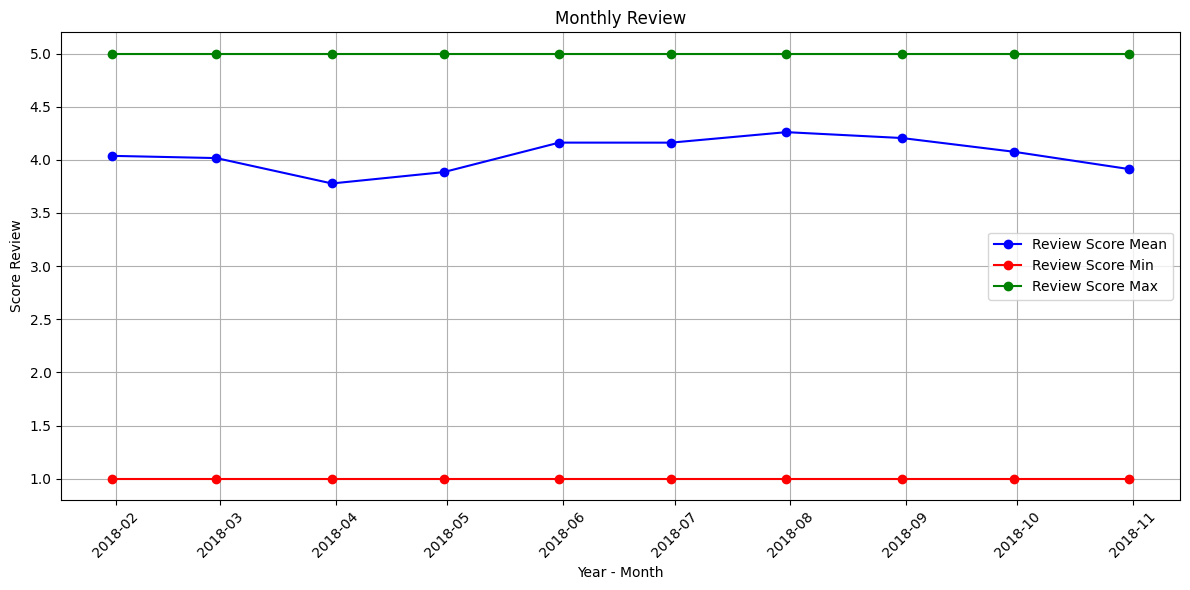

In [146]:
plt.figure(figsize=(12, 6))

plt.plot(monthly_reviews_2018.index, monthly_reviews_2018[('review_score', 'mean')], label='Review Score Mean', color='blue', marker='o')
plt.plot(monthly_reviews_2018.index, monthly_reviews_2018[('review_score', 'min')], label='Review Score Min', color='red', marker='o')
plt.plot(monthly_reviews_2018.index, monthly_reviews_2018[('review_score', 'max')], label='Review Score Max', color='green', marker='o')

plt.title('Monthly Review')
plt.xlabel('Year - Month')
plt.ylabel('Score Review')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

Based on the line chart above, it can be seen that the average review score is quite good.

### Explore all data

In [147]:
geolocation_customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,99441,99441,99441.000000,99441,99441,99163.000000,99163.000000,99163.000000
unique,99441,96096,NaN,4119,27,NaN,NaN,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,NaN,NaN,NaN
freq,1,17,NaN,15540,41746,NaN,NaN,NaN
mean,NaN,NaN,35137.474583,NaN,NaN,35057.887176,-21.190884,-46.175539
std,NaN,NaN,29797.938996,NaN,NaN,29784.314664,5.609013,4.056745
min,NaN,NaN,1003.000000,NaN,NaN,1003.000000,-33.689890,-72.668821
25%,NaN,NaN,11347.000000,NaN,NaN,11320.000000,-23.589417,-48.097915
50%,NaN,NaN,24416.000000,NaN,NaN,24350.000000,-22.924854,-46.630414
75%,NaN,NaN,58900.000000,NaN,NaN,58406.500000,-20.139309,-43.597342


In [148]:
order_product_order_items_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650,112650,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650,112650,112650.000000,112650.000000
unique,98666,98666,7,NaN,NaN,32951,74,NaN,NaN,NaN,NaN,NaN,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,NaN,NaN,NaN,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,21,110197,NaN,NaN,527,11115,NaN,NaN,NaN,NaN,NaN,2033,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:54:46.498002944,2018-01-24 20:12:15.531291392,NaN,NaN,2093.337506,30.148850,16.591114,22.992872,1.197834,NaN,2018-01-07 02:28:41.480692224,120.653739,19.990320
min,NaN,NaN,NaN,2016-09-04 00:00:00,2016-10-04 00:00:00,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,2016-09-19 00:00:00,0.850000,0.000000
25%,NaN,NaN,NaN,2017-09-13 00:00:00,2017-10-05 00:00:00,NaN,NaN,300.000000,18.000000,8.000000,15.000000,1.000000,NaN,2017-09-20 00:00:00,39.900000,13.080000
50%,NaN,NaN,NaN,2018-01-19 00:00:00,2018-02-16 00:00:00,NaN,NaN,700.000000,25.000000,13.000000,20.000000,1.000000,NaN,2018-01-26 00:00:00,74.990000,16.260000
75%,NaN,NaN,NaN,2018-05-04 00:00:00,2018-05-28 00:00:00,NaN,NaN,1800.000000,38.000000,20.000000,30.000000,1.000000,NaN,2018-05-10 00:00:00,134.900000,21.150000
max,NaN,NaN,NaN,2018-09-03 00:00:00,2018-10-25 00:00:00,NaN,NaN,40425.000000,105.000000,105.000000,118.000000,21.000000,NaN,2020-04-09 00:00:00,6735.000000,409.680000


##### Merge order_product_order_items_df & geolocation_customers_df

In [149]:
# Merge order_product_order_items_df & geolocation_customers_df
product_customers_df = pd.merge(
    left=geolocation_customers_df,
    right=order_product_order_items_df,
    how="right",
    left_on="customer_id",
    right_on="customer_id"
)

In [150]:
product_customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,...,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650,112650.000000,112650,112650,112348.000000,112348.000000,112348.000000,112650,112650,...,112650,112650.000000,112650.000000,112650.000000,112650.000000,112650.000000,112650,112650,112650.000000,112650.000000
unique,98666,95420,NaN,4110,27,NaN,NaN,NaN,98666,7,...,74,NaN,NaN,NaN,NaN,NaN,3095,NaN,NaN,NaN
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,NaN,NaN,NaN,8272b63d03f5f79c56e9e4120aec44ef,delivered,...,bed_bath_table,NaN,NaN,NaN,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,24,NaN,17808,47449,NaN,NaN,NaN,21,110197,...,11115,NaN,NaN,NaN,NaN,NaN,2033,NaN,NaN,NaN
mean,NaN,NaN,35119.309090,NaN,NaN,35042.482652,-21.233212,-46.201934,NaN,NaN,...,NaN,2093.337506,30.148850,16.591114,22.992872,1.197834,NaN,2018-01-07 02:28:41.480692224,120.653739,19.990320
min,NaN,NaN,1003.000000,NaN,NaN,1003.000000,-33.689890,-72.668821,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,2016-09-19 00:00:00,0.850000,0.000000
25%,NaN,NaN,11310.000000,NaN,NaN,11250.000000,-23.591055,-48.109939,NaN,NaN,...,NaN,300.000000,18.000000,8.000000,15.000000,1.000000,NaN,2017-09-20 00:00:00,39.900000,13.080000
50%,NaN,NaN,24340.000000,NaN,NaN,24240.000000,-22.929151,-46.634221,NaN,NaN,...,NaN,700.000000,25.000000,13.000000,20.000000,1.000000,NaN,2018-01-26 00:00:00,74.990000,16.260000
75%,NaN,NaN,59028.750000,NaN,NaN,58430.250000,-20.175876,-43.635549,NaN,NaN,...,NaN,1800.000000,38.000000,20.000000,30.000000,1.000000,NaN,2018-05-10 00:00:00,134.900000,21.150000
max,NaN,NaN,99990.000000,NaN,NaN,99990.000000,42.184003,-8.723762,NaN,NaN,...,NaN,40425.000000,105.000000,105.000000,118.000000,21.000000,NaN,2020-04-09 00:00:00,6735.000000,409.680000


##### Merge product_customers_df & sellers_df

In [151]:
# Merge product_customers_df & sellers_df
product_customers_sellers_df = pd.merge(
    left=product_customers_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

In [152]:
product_customers_sellers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,...,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
count,112650,112650,112650.000000,112650,112650,112348.000000,112348.000000,112348.000000,112650,112650,...,112650.000000,112650.000000,112650.000000,112650,112650,112650.000000,112650.000000,112650.000000,112650,112650
unique,98666,95420,NaN,4110,27,NaN,NaN,NaN,98666,7,...,NaN,NaN,NaN,3095,NaN,NaN,NaN,NaN,611,23
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,NaN,NaN,NaN,8272b63d03f5f79c56e9e4120aec44ef,delivered,...,NaN,NaN,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,sao paulo,SP
freq,21,24,NaN,17808,47449,NaN,NaN,NaN,21,110197,...,NaN,NaN,NaN,2033,NaN,NaN,NaN,NaN,27983,80342
mean,NaN,NaN,35119.309090,NaN,NaN,35042.482652,-21.233212,-46.201934,NaN,NaN,...,16.591114,22.992872,1.197834,NaN,2018-01-07 02:28:41.480692224,120.653739,19.990320,24439.170431,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,1003.000000,-33.689890,-72.668821,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,2016-09-19 00:00:00,0.850000,0.000000,1001.000000,NaN,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,11250.000000,-23.591055,-48.109939,NaN,NaN,...,8.000000,15.000000,1.000000,NaN,2017-09-20 00:00:00,39.900000,13.080000,6429.000000,NaN,NaN
50%,NaN,NaN,24340.000000,NaN,NaN,24240.000000,-22.929151,-46.634221,NaN,NaN,...,13.000000,20.000000,1.000000,NaN,2018-01-26 00:00:00,74.990000,16.260000,13568.000000,NaN,NaN
75%,NaN,NaN,59028.750000,NaN,NaN,58430.250000,-20.175876,-43.635549,NaN,NaN,...,20.000000,30.000000,1.000000,NaN,2018-05-10 00:00:00,134.900000,21.150000,27930.000000,NaN,NaN
max,NaN,NaN,99990.000000,NaN,NaN,99990.000000,42.184003,-8.723762,NaN,NaN,...,105.000000,118.000000,21.000000,NaN,2020-04-09 00:00:00,6735.000000,409.680000,99730.000000,NaN,NaN


##### Merge product_customers_sellers_df & order_payments_df

In [153]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [154]:
# Merge product_customers_sellers_df & order_payments_df
payments_product_customers_sellers_df = pd.merge(
    left=product_customers_sellers_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [155]:
payments_product_customers_sellers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,...,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
count,117604,117604,117604.000000,117604,117604,117292.000000,117292.000000,117292.000000,117604,117604,...,117604,117604.000000,117604.000000,117604.000000,117604,117604,117601.000000,117601,117601.000000,117601.000000
unique,98666,95420,NaN,4110,27,NaN,NaN,NaN,98666,7,...,NaN,NaN,NaN,NaN,611,23,NaN,4,NaN,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,NaN,NaN,895ab968e7bb0d5659d16cd74cd1650c,delivered,...,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN
freq,63,75,NaN,18590,49569,NaN,NaN,NaN,63,115038,...,NaN,NaN,NaN,NaN,29157,83854,NaN,86769,NaN,NaN
mean,NaN,NaN,35051.271385,NaN,NaN,34974.550890,-21.224048,-46.188435,NaN,NaN,...,2018-01-05 18:13:24.462433536,120.822849,20.045551,24442.886483,NaN,NaN,1.093528,NaN,2.939482,172.686752
min,NaN,NaN,1003.000000,NaN,NaN,1003.000000,-33.689890,-72.668821,NaN,NaN,...,2016-09-19 00:00:00,0.850000,0.000000,1001.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,11310.000000,NaN,NaN,11250.000000,-23.589712,-48.097913,NaN,NaN,...,2017-09-18 00:00:00,39.900000,13.080000,6429.000000,NaN,NaN,1.000000,NaN,1.000000,60.870000
50%,NaN,NaN,24315.000000,NaN,NaN,24230.000000,-22.927686,-46.631157,NaN,NaN,...,2018-01-25 00:00:00,74.900000,16.290000,13660.000000,NaN,NaN,1.000000,NaN,2.000000,108.210000
75%,NaN,NaN,58600.000000,NaN,NaN,58220.000000,-20.175876,-43.600621,NaN,NaN,...,2018-05-10 00:00:00,134.900000,21.190000,28035.000000,NaN,NaN,1.000000,NaN,4.000000,189.260000
max,NaN,NaN,99990.000000,NaN,NaN,99990.000000,42.184003,-8.723762,NaN,NaN,...,2020-04-09 00:00:00,6735.000000,409.680000,99730.000000,NaN,NaN,29.000000,NaN,24.000000,13664.080000


In [156]:
payments_product_customers_sellers_df.groupby(by="order_id").payment_value.sum().sort_values(ascending=False)

,payment_value
order_id,
03caa2c082116e1d31e67e9ae3700499,109312.64
ab14fdcfbe524636d65ee38360e22ce8,45256.00
1b15974a0141d54e36626dca3fdc731a,44048.00
2cc9089445046817a7539d90805e6e5a,36489.24
e8fa22c3673b1dd17ea315021b1f0f61,30186.00
...,...
47d11383b93b217d96defbb2ef1a209b,11.56
37193e64eb9a46b7f3197762f242b20a,10.89
e8bbc1d69fee39eee4c72cb5c969e39d,10.07


##### Merge all table

In [157]:
latest_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98673 entries, 51963 to 92457
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98673 non-null  object        
 1   order_id                 98673 non-null  object        
 2   review_score             98673 non-null  int64         
 3   review_creation_date     98673 non-null  datetime64[ns]
 4   review_answer_timestamp  98673 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.5+ MB


In [158]:
latest_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,98673,98673,98673.000000,98673,98673
unique,98110,98673,NaN,NaN,NaN
top,69a1068c3128a14994e3e422e4539e04,00010242fe8c5a6d1ba2dd792cb16214,NaN,NaN,NaN
freq,3,1,NaN,NaN,NaN
mean,NaN,NaN,4.086437,2018-01-13 04:42:20.609893120,2018-01-15 18:45:40.907847168
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 00:00:00
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 00:00:00
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-05 00:00:00
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 00:00:00
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 00:00:00


In [159]:
# Merge all table
all_df = pd.merge(
    left=payments_product_customers_sellers_df,
    right=latest_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

In [160]:
all_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_id,order_status,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
count,117604,117604,117604.000000,117604,117604,117292.000000,117292.000000,117292.000000,117604,117604,...,117604,117604,117601.000000,117601,117601.000000,117601.000000,116626,116626.000000,116626,116626
unique,98666,95420,NaN,4110,27,NaN,NaN,NaN,98666,7,...,611,23,NaN,4,NaN,NaN,97410,NaN,NaN,NaN
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,NaN,NaN,895ab968e7bb0d5659d16cd74cd1650c,delivered,...,sao paulo,SP,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,NaN,NaN
freq,63,75,NaN,18590,49569,NaN,NaN,NaN,63,115038,...,29157,83854,NaN,86769,NaN,NaN,63,NaN,NaN,NaN
mean,NaN,NaN,35051.271385,NaN,NaN,34974.550890,-21.224048,-46.188435,NaN,NaN,...,NaN,NaN,1.093528,NaN,2.939482,172.686752,NaN,4.032051,2018-01-12 09:27:40.384476928,2018-01-14 23:27:25.691355136
min,NaN,NaN,1003.000000,NaN,NaN,1003.000000,-33.689890,-72.668821,NaN,NaN,...,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,2016-10-06 00:00:00,2016-10-07 00:00:00
25%,NaN,NaN,11310.000000,NaN,NaN,11250.000000,-23.589712,-48.097913,NaN,NaN,...,NaN,NaN,1.000000,NaN,1.000000,60.870000,NaN,4.000000,2017-09-23 00:00:00,2017-09-26 00:00:00
50%,NaN,NaN,24315.000000,NaN,NaN,24230.000000,-22.927686,-46.631157,NaN,NaN,...,NaN,NaN,1.000000,NaN,2.000000,108.210000,NaN,5.000000,2018-02-01 00:00:00,2018-02-04 00:00:00
75%,NaN,NaN,58600.000000,NaN,NaN,58220.000000,-20.175876,-43.600621,NaN,NaN,...,NaN,NaN,1.000000,NaN,4.000000,189.260000,NaN,5.000000,2018-05-15 00:00:00,2018-05-19 00:00:00
max,NaN,NaN,99990.000000,NaN,NaN,99990.000000,42.184003,-8.723762,NaN,NaN,...,NaN,NaN,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 00:00:00


In [161]:
all_df.groupby(by=["customer_city", "product_category_name"]).agg({
    "order_id": "nunique",
}).rename(columns={"order_id": "order_count"}).sort_values(by="order_count", ascending=False)

order_count
customer_city product_category_name             
sao paulo     bed_bath_table                1653
              health_beauty                 1533
              sports_leisure                1266
              housewares                    1107
              computers_accessories         1004
...                                          ...
iracemapolis  telephony                        1
              stationery                       1
              home_appliances                  1
              garden_tools                     1
zortea        not_defined                      1

[25723 rows x 1 columns]

In [162]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_id": "nunique",
}).rename(columns={"order_id": "order_count"}).sort_values(by="order_count", ascending=False)

order_count
customer_state product_category_name                      
SP             bed_bath_table                         4416
               health_beauty                          3789
               sports_leisure                         3296
               housewares                             2781
               furniture_decor                        2724
...                                                    ...
RO             industry_commerce_and_business            1
PB             audio                                     1
MA             cine_photo                                1
RO             home_confort                              1
RN             audio                                     1

[1394 rows x 1 columns]

In [163]:
all_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="order_id", ascending=False)

,order_id,payment_value
product_category_name,,
bed_bath_table,9417,1712553.67
health_beauty,8836,1657373.12
sports_leisure,7720,1392127.56
computers_accessories,6689,1585330.45
furniture_decor,6449,1430176.39
...,...,...
la_cuisine,13,2913.53
cds_dvds_musicals,12,1199.43
pc_gamer,8,2174.43


In [164]:
all_df.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
product_category_name,,
bed_bath_table,9417,1712553.67
health_beauty,8836,1657373.12
computers_accessories,6689,1585330.45
furniture_decor,6449,1430176.39
watches_gifts,5624,1429216.68
...,...,...
pc_gamer,8,2174.43
home_comfort_2,24,1710.54
cds_dvds_musicals,12,1199.43


It can be observed that the bed_bath_table product category is the best-selling and the highest contributor to the seller's revenue.

In [165]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117604 non-null  object        
 1   customer_unique_id             117604 non-null  object        
 2   customer_zip_code_prefix       117604 non-null  int64         
 3   customer_city                  117604 non-null  object        
 4   customer_state                 117604 non-null  object        
 5   geolocation_zip_code_prefix    117292 non-null  float64       
 6   geolocation_lat                117292 non-null  float64       
 7   geolocation_lng                117292 non-null  float64       
 8   order_id                       117604 non-null  object        
 9   order_status                   117604 non-null  object        
 10  order_purchase_timestamp       117604 non-null  datetime64[ns]
 11  

In [166]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Question 1: How has E-Commerce's sales and revenue performance been in the last few months?

In [167]:
daily_orders_df = all_df.groupby(by="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
daily_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
daily_orders_df.sort_index(ascending=False)

,order_count,revenue
order_purchase_timestamp,,
2018-09-03,1,166.46
2018-08-29,11,4262.66
2018-08-28,39,5012.70
2018-08-27,66,6720.78
2018-08-26,73,10496.35
...,...,...
2016-10-03,8,595.14
2016-10-02,1,109.34
2016-09-15,1,0.00


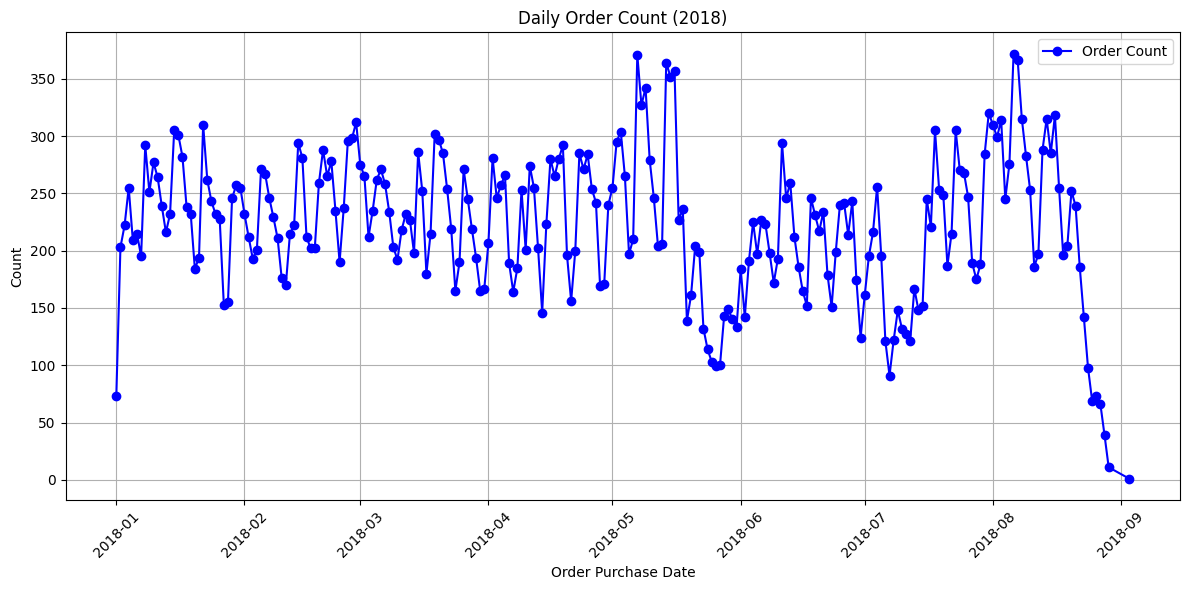

In [168]:
daily_orders_2018 = daily_orders_df[daily_orders_df.index.year == 2018]

plt.figure(figsize=(12, 6))

# Plot daily orders
plt.plot(daily_orders_2018.index, daily_orders_2018['order_count'], label='Order Count', color='blue', marker='o')

plt.title('Daily Order Count (2018)')
plt.xlabel('Order Purchase Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

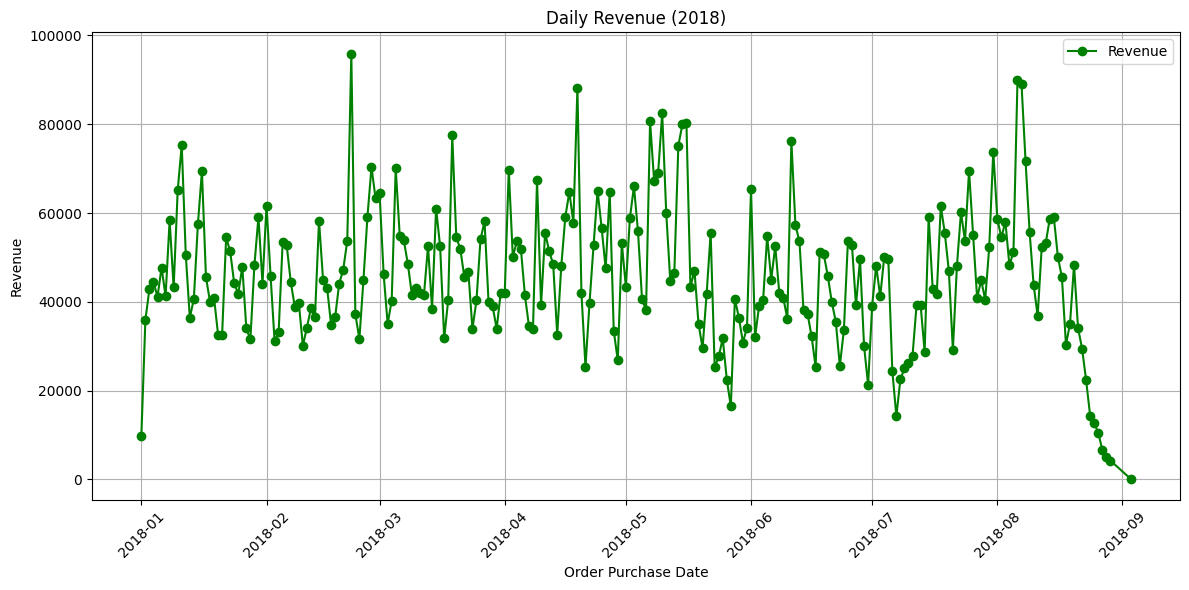

In [169]:
daily_orders_2018 = daily_orders_df[daily_orders_df.index.year == 2018]

plt.figure(figsize=(12, 6))

# Plot daily revenue
plt.plot(daily_orders_2018.index, daily_orders_2018['revenue'], label='Revenue', color='green', marker='o')

plt.title('Daily Revenue (2018)')
plt.xlabel('Order Purchase Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [170]:
daily_orderss_df = all_df.groupby(by="order_purchase_timestamp").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
daily_orderss_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
daily_orderss_df.sort_index(ascending=False)

,order_count,revenue
order_purchase_timestamp,,
2018-09-03,1,166.46
2018-08-29,11,4262.66
2018-08-28,39,5012.70
2018-08-27,66,6720.78
2018-08-26,73,10496.35
...,...,...
2016-10-03,8,595.14
2016-10-02,1,109.34
2016-09-15,1,0.00


In [171]:
monthly_orders_df = daily_orderss_df.resample('ME').agg({
    "order_count": "sum",
    "revenue": "sum"
}).sort_index(ascending=False)
monthly_orders_df

,order_count,revenue
order_purchase_timestamp,,
2018-09-30,1,166.46
2018-08-31,6452,1229643.72
2018-07-31,6273,1351705.34
2018-06-30,6160,1297594.81
2018-05-31,6853,1506974.84
2018-04-30,6934,1496811.52
2018-03-31,7188,1475599.95
2018-02-28,6694,1306048.80
2018-01-31,7220,1408365.65


In [172]:
monthly_orders_2018 = monthly_orders_df[monthly_orders_df.index.year == 2018].resample('ME').agg({
    "order_count": "sum",
    "revenue": "sum"
})
monthly_orders_2018

,order_count,revenue
order_purchase_timestamp,,
2018-01-31,7220,1408365.65
2018-02-28,6694,1306048.80
2018-03-31,7188,1475599.95
2018-04-30,6934,1496811.52
2018-05-31,6853,1506974.84
2018-06-30,6160,1297594.81
2018-07-31,6273,1351705.34
2018-08-31,6452,1229643.72
2018-09-30,1,166.46


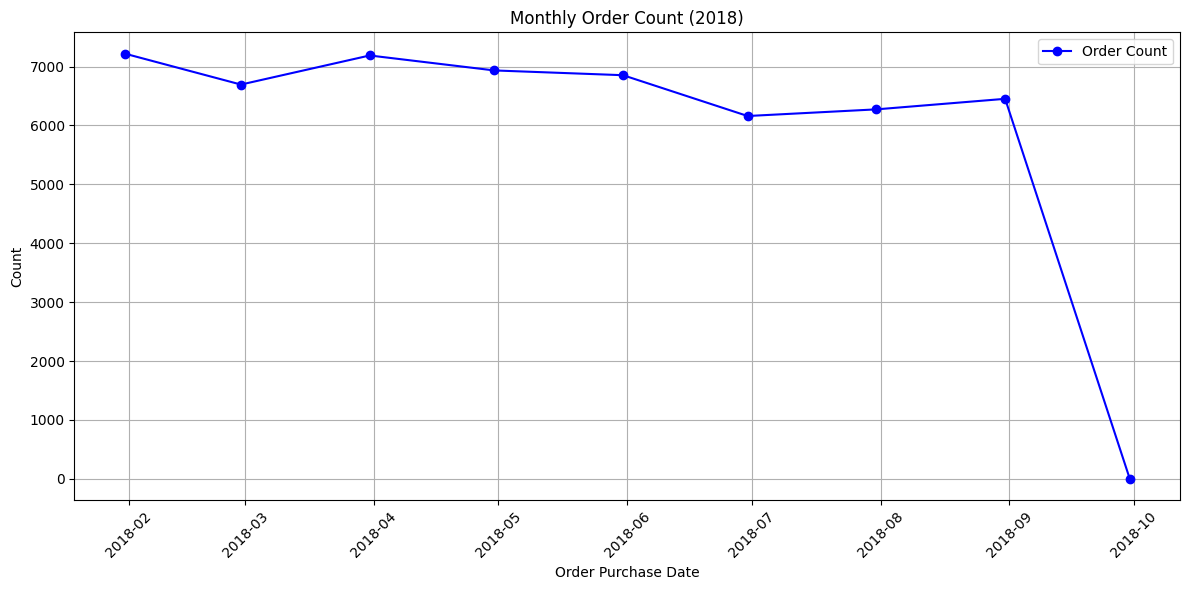

In [173]:
plt.figure(figsize=(12, 6))

# Plot monthly orders
plt.plot(monthly_orders_2018.index, monthly_orders_2018['order_count'], label='Order Count', color='blue', marker='o')

plt.title('Monthly Order Count (2018)')
plt.xlabel('Order Purchase Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

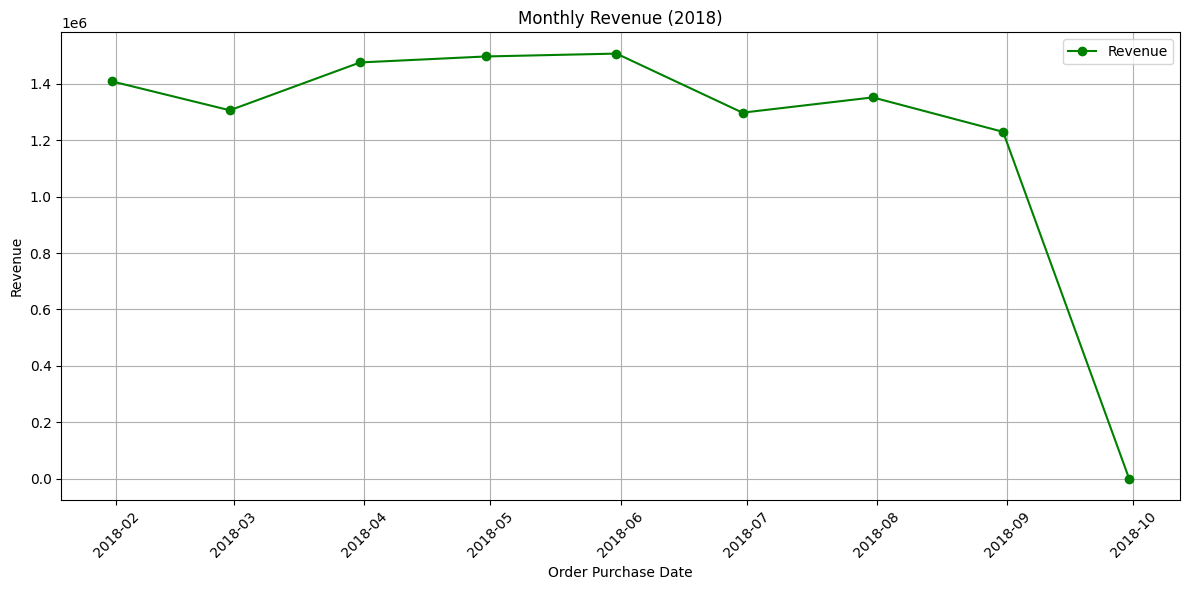

In [174]:
plt.figure(figsize=(12, 6))

# Plot monthly revenue
plt.plot(monthly_orders_2018.index, monthly_orders_2018['revenue'], label='Revenue', color='green', marker='o')

plt.title('Monthly Revenue (2018)')
plt.xlabel('Order Purchase Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.tight_layout()
plt.show()

It can be observed that the number of customer orders impacts the seller's revenue.

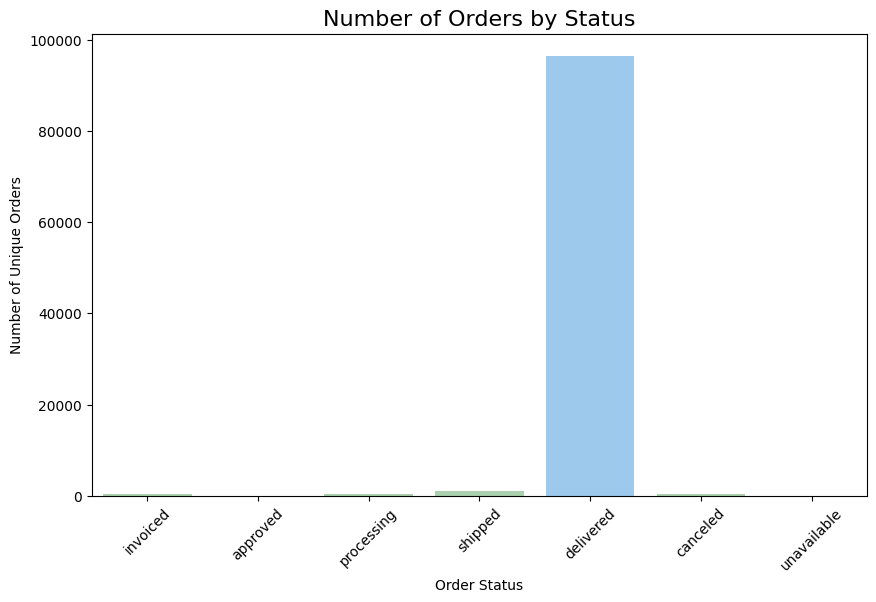

In [175]:
count_order_status_df = all_df.groupby(by="order_status").agg({
    "order_id": "nunique"
}).reset_index()

count_order_status_df['order_status'] = pd.Categorical(
    count_order_status_df['order_status'],
    categories=["invoiced", "approved", "processing", "shipped", "delivered", "canceled", "unavailable"],
    ordered=True
)

count_order_status_df = count_order_status_df.sort_values(by="order_status")

max_count = count_order_status_df["order_id"].max()
max_status = count_order_status_df.loc[count_order_status_df["order_id"] == max_count, "order_status"].values[0]

colors = ["#90CAF9" if status == max_status else "#A5D6A7" for status in count_order_status_df["order_status"]]

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x="order_status",
    y="order_id",
    hue="order_status",
    data=count_order_status_df,
    palette=colors,
    legend=False
)
plt.title("Number of Orders by Status", fontsize=16)
plt.xlabel("Order Status")
plt.ylabel("Number of Unique Orders")
plt.xticks(rotation=45)
plt.show()

### Question 2: Which product categories sell the most and least?

In [176]:
sum_order_items_df = all_df.groupby(by="product_category_name").agg({
    "order_id": "count"
}).sort_values(by="order_id", ascending=False)
sum_order_items_df

,order_id
product_category_name,
bed_bath_table,11823
health_beauty,9975
sports_leisure,8945
furniture_decor,8744
computers_accessories,8082
...,...
portateis_cozinha_e_preparadores_de_alimentos,15
cds_dvds_musicals,14
pc_gamer,10


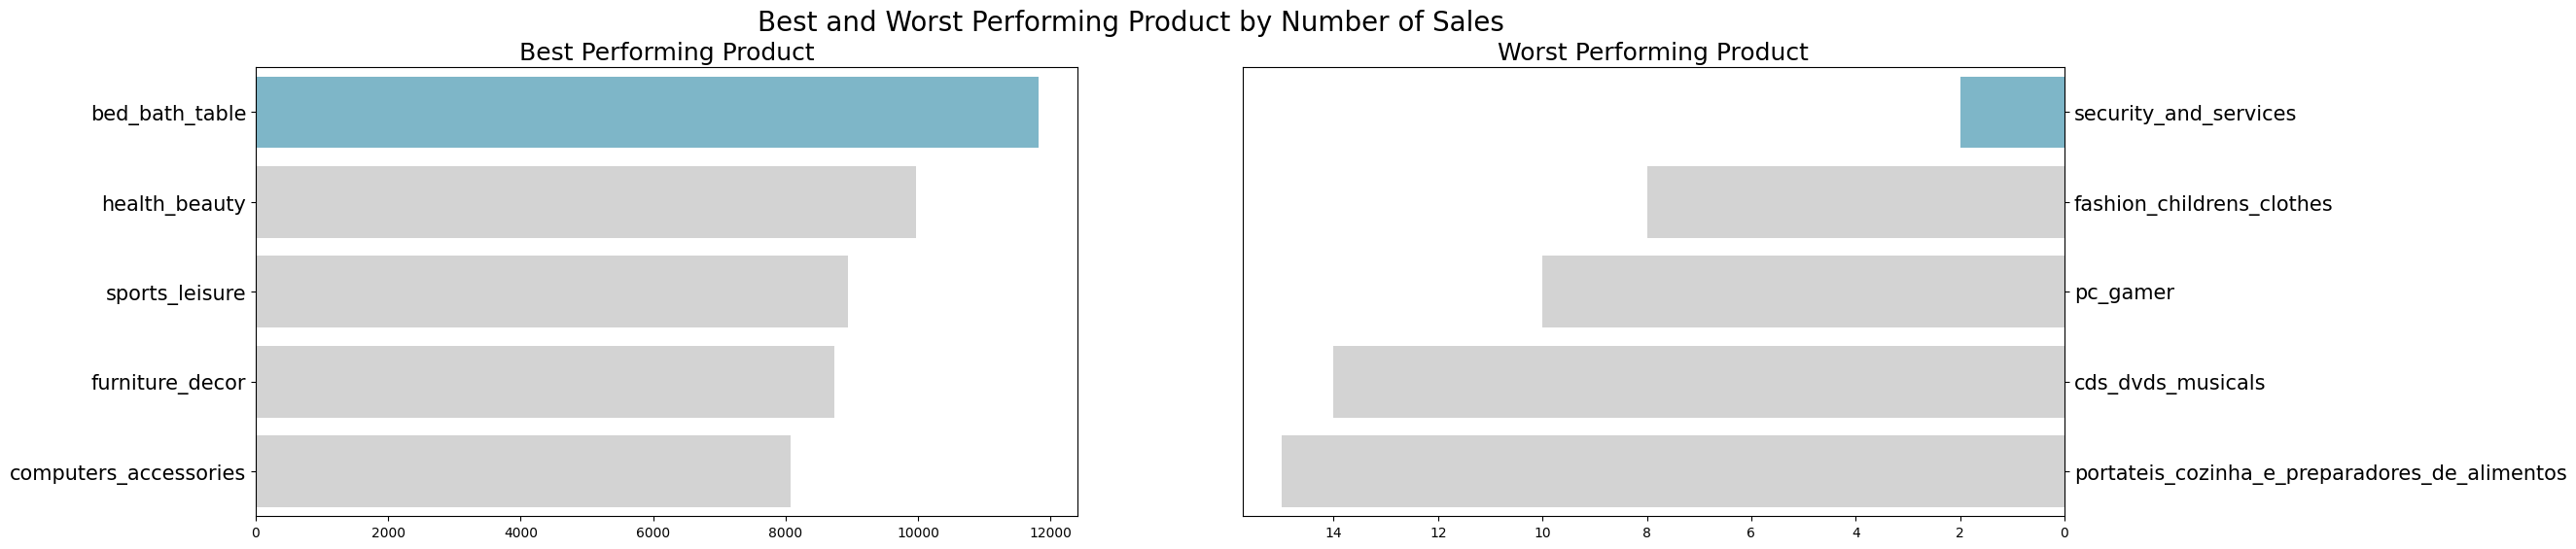

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.head(5), hue="product_category_name", palette=colors, legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), hue="product_category_name", palette=colors, legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

The most popular and best-selling product category is bed_bath_table, while the least sold category is security_and_services.

### Question 3: How is the geographical distribution of customers and sellers in E-Commerce?

In [178]:
customerbystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
customerbystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
customerbystate_df

,customer_state,customer_count
0,AC,81
1,AL,411
2,AM,147
3,AP,68
4,BA,3358
5,CE,1327
6,DF,2125
7,ES,2025
8,GO,2007
9,MA,740


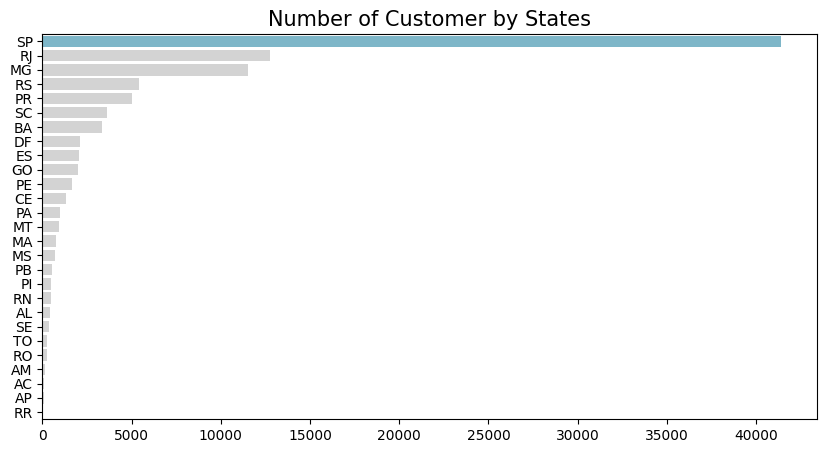

In [179]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 26
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=customerbystate_df.sort_values(by="customer_count", ascending=False),
    hue="customer_state",
    palette=colors_,
    legend=False
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

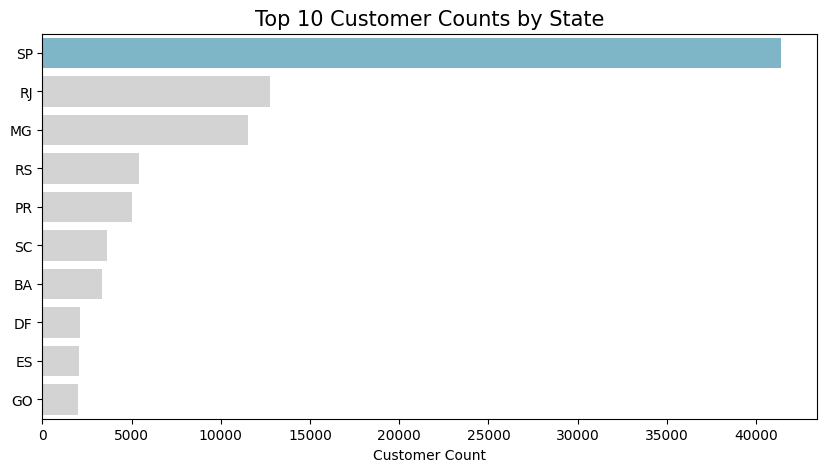

In [180]:
top_10_customer_states_df = customerbystate_df.sort_values(by="customer_count", ascending=False).head(10)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=top_10_customer_states_df,
    hue="customer_state",
    palette=colors_,
    legend=False
)

plt.title("Top 10 Customer Counts by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Customer Count")
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [181]:
customerbycity_df = all_df.groupby(by="customer_city").customer_id.nunique().reset_index()
customerbycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
customerbycity_df

,customer_city,customer_count
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2
...,...,...
4105,xinguara,9
4106,xique-xique,3
4107,zacarias,2
4108,ze doca,5


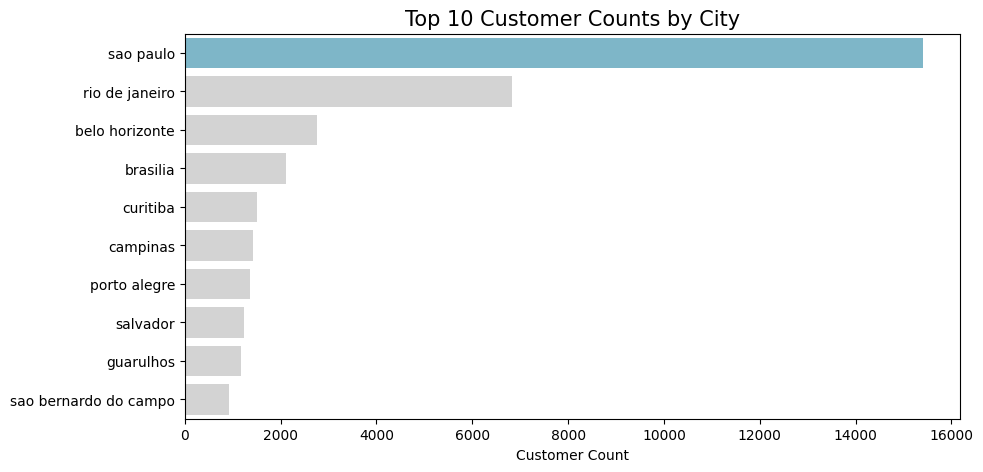

In [182]:
top_10_customer_city_df = customerbycity_df.sort_values(by="customer_count", ascending=False).head(10)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9
sns.barplot(
    x="customer_count",
    y="customer_city",
    data=top_10_customer_city_df,
    hue="customer_city",
    palette=colors_,
    legend=False
)

plt.title("Top 10 Customer Counts by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Customer Count")
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [183]:
sellerbystate_df = all_df.groupby(by="seller_state").seller_id.nunique().reset_index()
sellerbystate_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
sellerbystate_df

,seller_state,seller_count
0,AC,1
1,AM,1
2,BA,19
3,CE,13
4,DF,30
5,ES,23
6,GO,40
7,MA,1
8,MG,244
9,MS,5


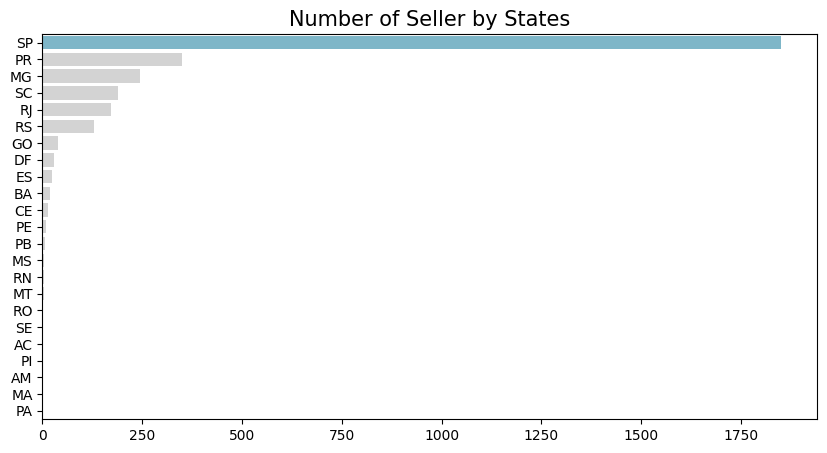

In [184]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 22
sns.barplot(
    x="seller_count",
    y="seller_state",
    data=sellerbystate_df.sort_values(by="seller_count", ascending=False),
    hue="seller_state",
    palette=colors_,
    legend=False
)
plt.title("Number of Seller by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=10)
plt.show()

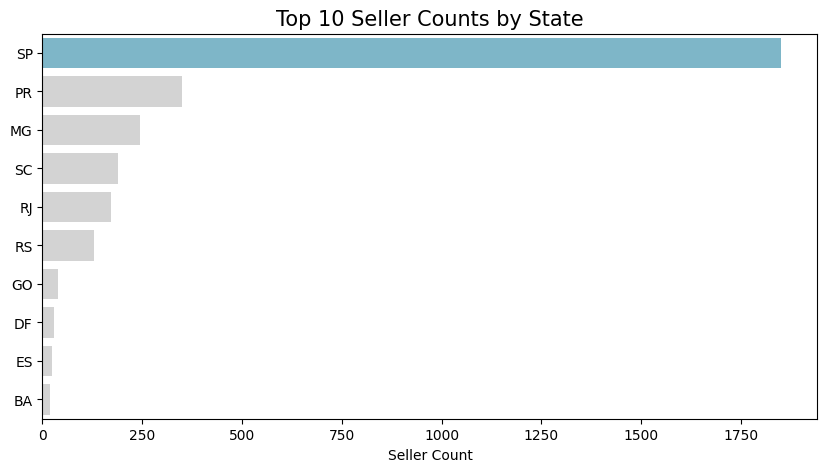

In [185]:
top_10_seller_states_df = sellerbystate_df.sort_values(by="seller_count", ascending=False).head(10)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9
sns.barplot(
    x="seller_count",
    y="seller_state",
    data=top_10_seller_states_df,
    hue="seller_state",
    palette=colors_,
    legend=False
)

plt.title("Top 10 Seller Counts by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Seller Count")
plt.tick_params(axis='y', labelsize=10)
plt.show()

In [186]:
sellerbycity_df = all_df.groupby(by="seller_city").seller_id.nunique().reset_index()
sellerbycity_df.rename(columns={
    "seller_id": "seller_count"
}, inplace=True)
sellerbycity_df

,seller_city,seller_count
0,04482255,1
1,abadia de goias,1
2,afonso claudio,1
3,aguas claras df,1
4,alambari,1
...,...,...
606,volta redonda,2
607,votorantim,4
608,votuporanga,4
609,xanxere,2


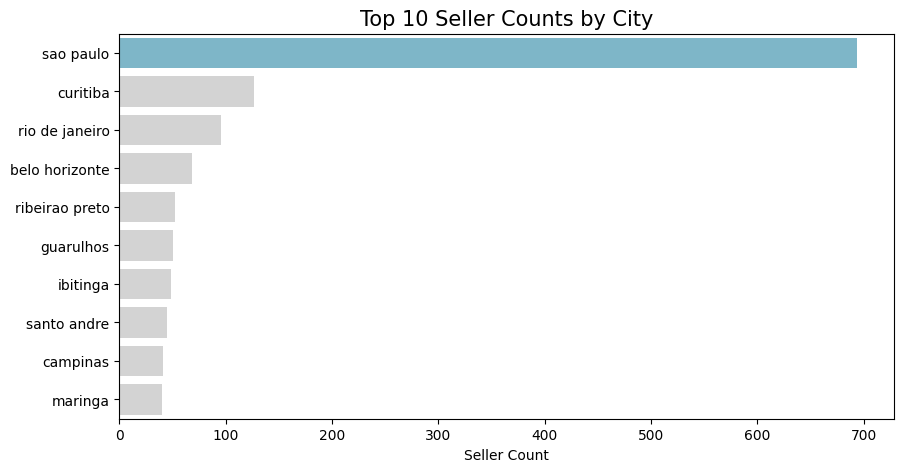

In [187]:
top_10_seller_city_df = sellerbycity_df.sort_values(by="seller_count", ascending=False).head(10)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9
sns.barplot(
    x="seller_count",
    y="seller_city",
    data=top_10_seller_city_df,
    hue="seller_city",
    palette=colors_,
    legend=False
)

plt.title("Top 10 Seller Counts by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Seller Count")
plt.tick_params(axis='y', labelsize=10)
plt.show()

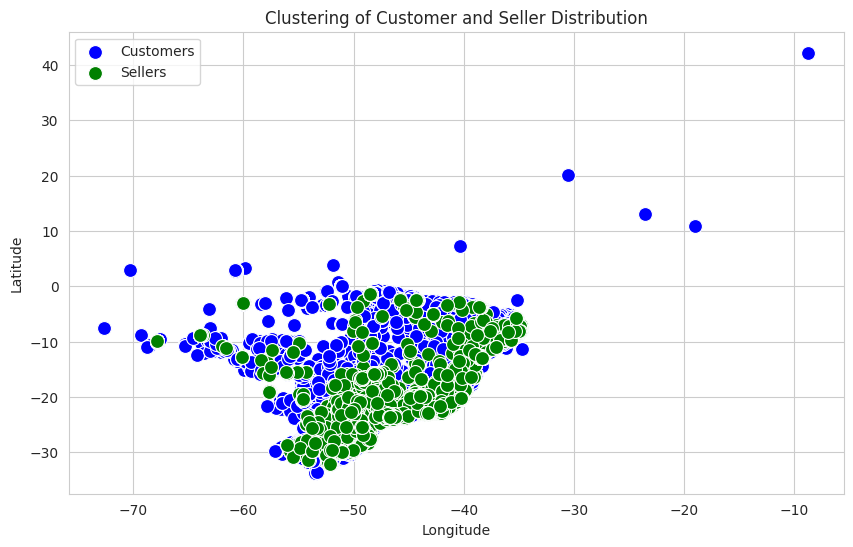

In [188]:
geolocation_customers_df = all_df.sort_values(by=['customer_id', 'order_purchase_timestamp'], ascending=[True, False])
latest_customer_data = geolocation_customers_df.drop_duplicates(subset='customer_id', keep='first')

geolocation_sellers_df = all_df.sort_values(by=['seller_id', 'order_purchase_timestamp'], ascending=[True, False])
latest_seller_data = geolocation_sellers_df.drop_duplicates(subset='seller_id', keep='first')

customer_data = pd.DataFrame({
    'latitude': latest_customer_data['geolocation_lat'],
    'longitude': latest_customer_data['geolocation_lng']
})

seller_data = pd.DataFrame({
    'latitude': latest_seller_data['geolocation_lat'],
    'longitude': latest_seller_data['geolocation_lng']
})

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.scatterplot(x=customer_data['longitude'], y=customer_data['latitude'],
                color='blue', s=100, label='Customers')

sns.scatterplot(x=seller_data['longitude'], y=seller_data['latitude'],
                color='green', s=100, label='Sellers')

plt.title('Clustering of Customer and Seller Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()

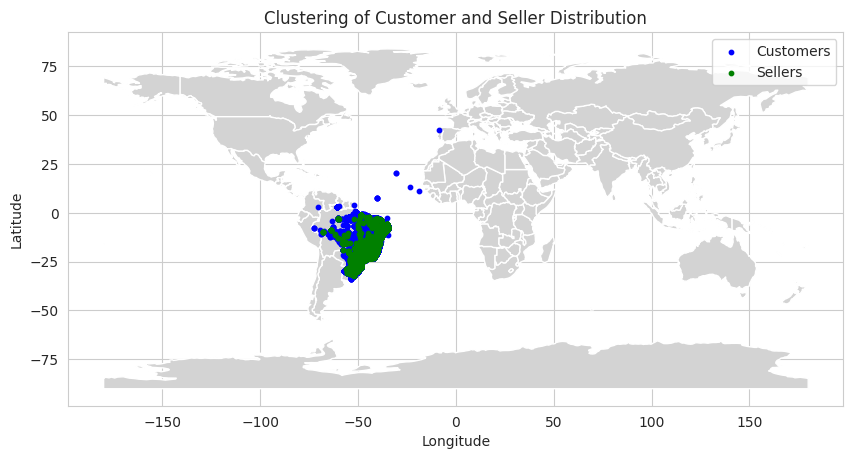

In [189]:
# Path Natural Earth shapefile
world_shapefile = "110m_cultural/ne_110m_admin_0_countries.shp"

# Load the world map shapefile
world = gpd.read_file(world_shapefile)

# GeoDataFrame customer
customer_map = gpd.GeoDataFrame(
    latest_customer_data,
    geometry=gpd.points_from_xy(latest_customer_data['geolocation_lng'], latest_customer_data['geolocation_lat'])
)

# GeoDataFrame seller
seller_map = gpd.GeoDataFrame(
    latest_seller_data,
    geometry=gpd.points_from_xy(latest_seller_data['geolocation_lng'], latest_seller_data['geolocation_lat'])
)

# Plot map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')

# Plot customers
customer_map.plot(ax=ax, color='blue', markersize=10, label='Customers')

# Plot sellers
seller_map.plot(ax=ax, color='green', markersize=10, label='Sellers')

plt.title('Clustering of Customer and Seller Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()

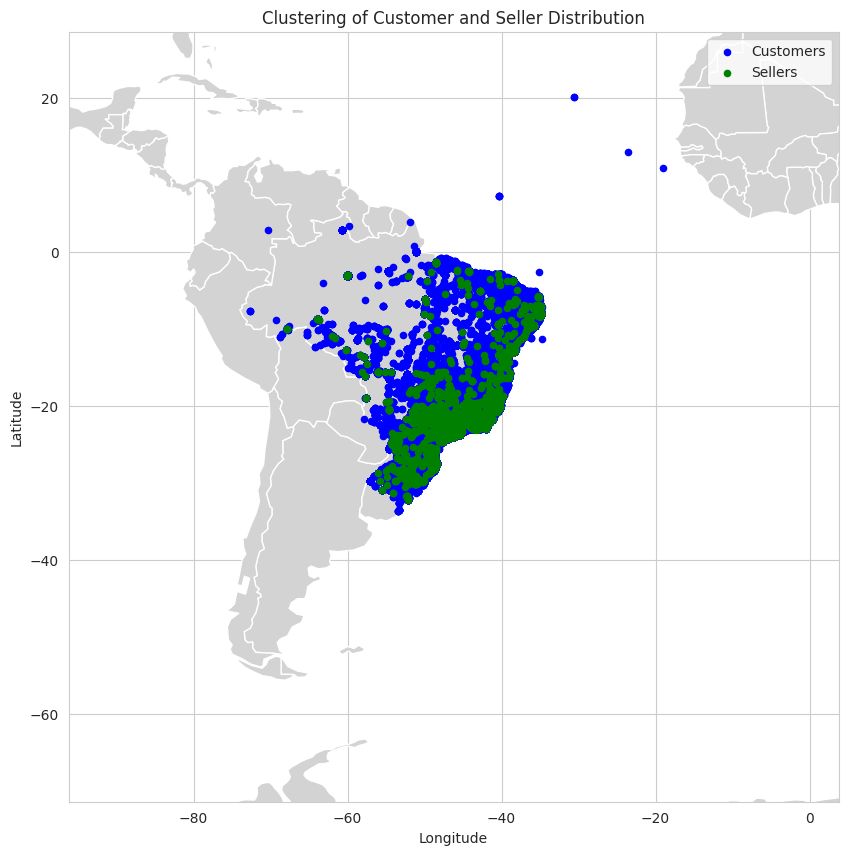

In [190]:
# Determining the map center based on the average latitude and longitude
center_lat = (customer_map['geolocation_lat'].mean() + seller_map['geolocation_lat'].mean()) / 2
center_lng = (customer_map['geolocation_lng'].mean() + seller_map['geolocation_lng'].mean()) / 2

# Defining map boundaries around the center with a specific range
lat_range = 50
lng_range = 50

fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey')

customer_map.plot(ax=ax, color='blue', markersize=20, label='Customers')
seller_map.plot(ax=ax, color='green', markersize=20, label='Sellers')

ax.set_xlim([center_lng - lng_range, center_lng + lng_range])
ax.set_ylim([center_lat - lat_range, center_lat + lat_range])

plt.title('Clustering of Customer and Seller Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

plt.show()

In [191]:
customer_map = latest_customer_data.dropna(subset=['geolocation_lat', 'geolocation_lng'])
seller_map = latest_seller_data.dropna(subset=['geolocation_lat', 'geolocation_lng'])

center_lat = (customer_map['geolocation_lat'].mean() + seller_map['geolocation_lat'].mean()) / 2
center_lng = (customer_map['geolocation_lng'].mean() + seller_map['geolocation_lng'].mean()) / 2

# Create folium map
m = folium.Map(location=[center_lat, center_lng], zoom_start=10)

customer_cluster = MarkerCluster(name='Customers').add_to(m)

for idx, row in customer_map.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        icon=folium.Icon(color='blue', icon='user'),
        popup=f"Customer {idx}"
    ).add_to(customer_cluster)

seller_cluster = MarkerCluster(name='Sellers').add_to(m)

for idx, row in seller_map.iterrows():
    folium.Marker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        icon=folium.Icon(color='green', icon='shopping-cart'),
        popup=f"Seller {idx}"
    ).add_to(seller_cluster)

folium.LayerControl().add_to(m)

m.save("customer_seller_map.html")

### Question 4: Which state sellers contribute the most to sales?

In [192]:
seller_state_order_df = all_df.groupby(by="seller_state").agg({
    "order_id": "nunique",
}).rename(columns={"order_id":"order_count"}).sort_values(by="order_count", ascending=False)
seller_state_order_df

,order_count
seller_state,
SP,70188
MG,7930
PR,7673
RJ,4353
SC,3667
RS,1989
DF,824
BA,569
GO,463


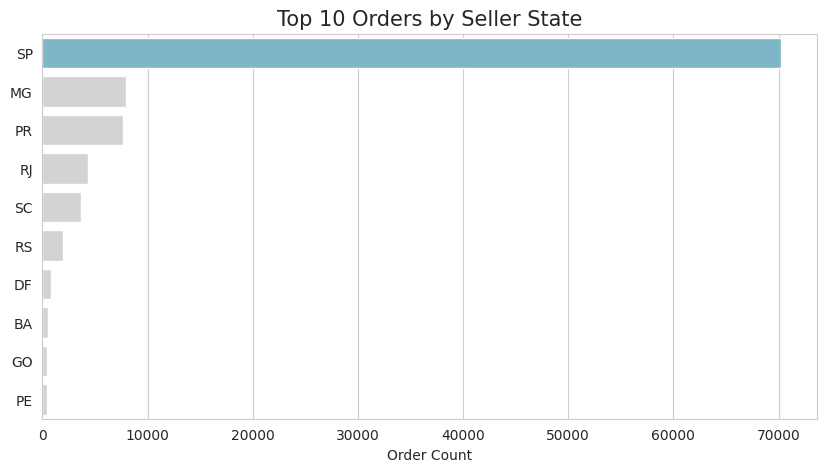

In [193]:
top_10_seller_state_order_df = seller_state_order_df.sort_values(by="order_count", ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4"] + ["#D3D3D3"] * 9
sns.barplot(
    x="order_count",
    y="seller_state",
    data=top_10_seller_state_order_df,
    hue="seller_state",
    palette=colors_,
    legend=False
)

plt.title("Top 10 Orders by Seller State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Order Count")
plt.tick_params(axis='y', labelsize=10)
plt.show()

### RFM Analysis

Recency: A parameter used to determine when a customer last made a transaction.

Frequency: This parameter is used to identify how often a customer makes transactions.

Monetary: This parameter is used to identify how much revenue comes from customer.

In [194]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # last order date
    "order_id": "nunique", # count the number of orders
    "payment_value": "sum" # total revenue
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01


### Question 5: When was the last time the customer made a transaction?

In [195]:
recent_date = all_df["order_purchase_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date-x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,154


In [196]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383
4,000379cdec625522490c315e70c7a9fb,1,107.01,154


In [197]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
29063,4b7decb9b58e2569548b8b4c8e20e8d7,1,166.46,0
76152,c4c66f47534e09a03fc7a878a9eda5ea,1,74.21,5
52937,898b7fee99c4e42170ab69ba59be0a8b,1,93.75,5
88844,e60df9449653a95af4549bbfcb18a6eb,1,1021.92,5
42327,6e353700bc7bcdf6ebc15d6de16d7002,1,61.29,5


Display the 5 customers whose most recent transactions are closest to the current date (the smaller the recency, the more frequently they return).

### Question 6: How often has a customer made a purchase in the last few months?

In [198]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
65713,aa33d697a2f5ee04aae5e9a8227e913e,1,107.78,380
65783,aa5f8aa4c21fe89a04e8d221d4cd8ac1,1,44.28,14
65782,aa5f87b79875f43b90b310decb62356e,1,151.58,312
65781,aa5f5931b8901ae1ca4b8302f9b94c02,1,101.87,332


Display the 5 customers who make the most transactions (the higher the frequency, the more often they make transactions).

### Question 7: How much money have customers spent in the last few months?

In [199]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8475,1617b1357756262bfa56ab541c47bc16,1,109312.64,339
73311,bd5d39761aa56689a265d95d8d32b8be,1,45256.00,376
73568,be1b70680b9f9694d8c70f41fa3dc92b,1,44048.00,193
2049,05455dfa7cd02f13d132aa7a6a9729c6,1,36489.24,283
12307,1ff773612ab8934db89fd5afa8afe506,1,30186.00,137


Display the 5 customers with the highest total transaction value (the higher the monetary value, the higher the total amount they spent).

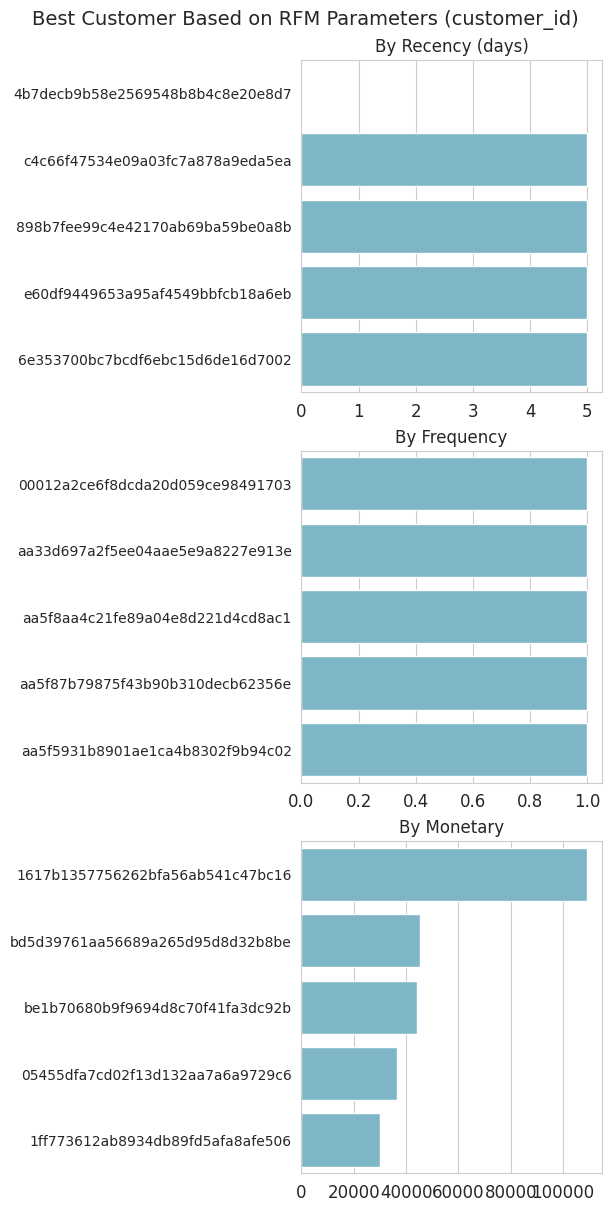

In [200]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 12), constrained_layout=True)

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), hue="customer_id", palette=colors, legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=12)
ax[0].tick_params(axis ='x', labelsize=12)

sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), hue="customer_id", palette=colors, legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=12)
ax[1].tick_params(axis='x', labelsize=12)

sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), hue="customer_id", palette=colors, legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=12)
ax[2].tick_params(axis='x', labelsize=12)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)",x=0.5, fontsize=14)
plt.show()

#### Sort customers by recency, frequency, and monetary score

In [201]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293,33933.0,49333.5,51312.0
1,000161a058600d5901f007fab4c27140,1,67.41,414,16637.5,49333.5,27989.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552,2807.0,49333.5,73898.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383,20905.0,49333.5,70896.5
4,000379cdec625522490c315e70c7a9fb,1,107.01,154,66341.0,49333.5,48270.5


r_rank: Indicates the ranking of each customer based on Recency, with a lower rank meaning they return more frequently.

f_rank: Indicates the ranking of each customer based on Frequency, with a higher rank for customers who transact more often.

m_rank: Indicates the ranking of each customer based on Monetary, with a higher rank for customers with greater spending value.

In [202]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293,34.391786,100.0,52.005757
1,000161a058600d5901f007fab4c27140,1,67.41,414,16.862445,100.0,28.367421
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552,2.844952,100.0,74.897634
3,0002414f95344307404f0ace7a26f1d5,1,179.35,383,21.187643,100.0,71.855046
4,000379cdec625522490c315e70c7a9fb,1,107.01,154,67.237954,100.0,48.923135


r_rank_norm: Indicates the normalized rank based on Recency.

f_rank_norm: Indicates the normalized rank based on Frequency.

m_rank_norm: Indicates the normalized rank based on Monetary.

Customers with lower rank values in these three columns are considered more valuable because they transact more frequently, have higher purchase values, or have recently made a transaction.

In [203]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.14
1,000161a058600d5901f007fab4c27140,2.33
2,0001fd6190edaaf884bcaf3d49edf079,3.56
3,0002414f95344307404f0ace7a26f1d5,3.61
4,000379cdec625522490c315e70c7a9fb,3.30
5,0004164d20a9e969af783496f3408652,2.34
6,000419c5494106c306a97b5635748086,2.32


Customers with a lower RFM_score are more valuable to the business because they have better recency, frequency, and monetary values (lower scores on the normalized ranking scale).

With the assigned weights, customers who transact frequently and have higher purchase values will have a lower RFM_score, making them more likely to be considered high-value customers.

#### Customer segment by RFM_score

In [204]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.14,Medium value customer
1,000161a058600d5901f007fab4c27140,2.33,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.56,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.61,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.30,Medium value customer
5,0004164d20a9e969af783496f3408652,2.34,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.69,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.69,Low value customers
9,000598caf2ef4117407665ac33275130,4.93,Top customers


In [205]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16012
1,Low value customers,41560
2,Medium value customer,34424
3,Top customers,5600
4,lost customers,1070


- The number of customers in this segment is important to monitor for retention efforts.
- Medium dan Low value customers: If this segment has a large number of customers, it represents a potential target for campaigns aimed at increasing their value.
- Lost customers: Represents the number of customers who are inactive or no longer engaged.

In [206]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

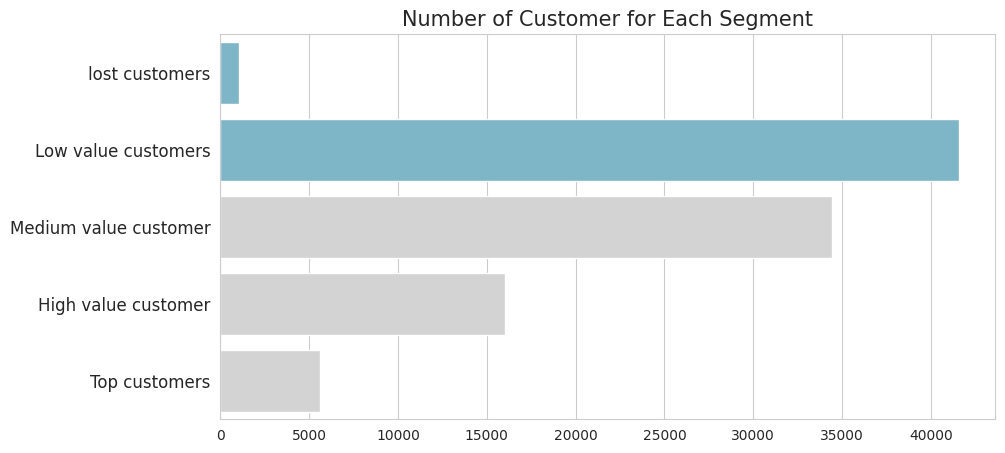

In [207]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    hue="customer_segment",
    palette=colors_,
    legend=False
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Key Insights
### Q1. How has E-Commerce's sales and revenue performance been in the last few months?
Based on the analysis results, it can be observed that the highest number of orders occurred in January. Additionally, there was a significant decline in the number of orders in June and September. This decline in orders impacted the total revenue generated by sellers. A decrease in the number of orders in e-commerce can be attributed to both internal and external factors.
Some potential internal causes include declining product or service quality, uncompetitive pricing, lack of marketing campaigns or promotions, and insufficient stock. Meanwhile, potential external causes may include increased competition, changes in customer behavior, economic factors, and more.
Possible solutions include:
- Enhancing product quality control
- Improving the logistics system to ensure timely delivery
- Providing prompt and friendly customer responses
- Analyzing market prices to ensure competitive pricing
- Implementing promotions such as discounts, cashback, and product bundling discounts
- Launching advertising campaigns on social media, email marketing, or Google Ads
- Using FOMO (fear of missing out) strategies like flash sales or limited-time offers
- Optimizing inventory management and offering pre-orders or restock notifications to address out-of-stock issues
- Introducing loyalty programs such as reward points or VIP memberships to foster customer loyalty
- Conducting surveys to understand customer needs
- Offering installment or pay-later options

### Q2. Which product categories sell the most and least?
The product category with the highest sales is bed_bath_table, while the category with the lowest sales is security_and_services. To address the imbalance in product sales, sellers can analyze the reasons why certain product categories dominate sales and investigate why other categories underperform. Poor sales performance may be due to factors such as pricing issues, product quality concerns, lack of promotional efforts, or unappealing and uninformative product descriptions.
Possible solutions include:
- Optimizing promotions for less popular product categories by offering discounts, cashback, product bundle discounts, or free shipping vouchers
- Highlighting product uniqueness in promotional campaigns
- Collaborating with influencers to reach new audiences
- Conducting A/B testing to experiment with various marketing strategies and promotional approaches to identify the most effective ones
- Performing regular evaluations, and if the product still underperforms, considering discontinuing the stock or selling it as a clearance item

### Q3. How is the geographical distribution of customers and sellers in E-Commerce?
The geographic distribution of customers and sellers on E-Commerce Public is predominantly concentrated in the state and city of São Paulo, Brazil.
This may be due to limited promotional reach in other regions, high shipping costs, longer delivery times to other areas which make customers and sellers less interested in E-Commerce Public, products that are less relevant to other regions, and a lack of trust from those regions.
To address this issue, the following solutions can be implemented:
- Expanding marketing strategies through social media and collaborating with influencers or local communities in other regions to introduce the E-Commerce Public platform to new areas
- Establishing regional warehouses in strategic locations to better serve customers and sellers from a broader geographic area
- Developing products tailored to the needs of other regions
- Recruiting and training teams that understand the culture and language of other regions to provide better service to customers from those areas
- Offering discounts, free shipping vouchers, and cashback incentives for customers from new regions
- Providing training and reducing commission fees for sellers from new regions
- Analyzing and understanding customer and seller behavior in new regions by identifying unique patterns that emerge

### Q4. Which state sellers contribute the most to sales?
The sellers contributing the most to sales are from the state of São Paulo. This is because the majority of E-Commerce Public customers and sellers are located in São Paulo.

### Q5. When was the last time the customer made a transaction?
Based on the RFM Analysis (Recency), there have been recent transactions made by customers.
To improve customer recency, sellers can implement the following strategies:
- Introduce loyalty programs such as point rewards that can be redeemed for discounts or gifts
- Offer cashback incentives for the next purchase
- Provide limited-time discount coupons
- Recommend products via notifications or emails, showcasing relevant items based on the customer’s purchase history
- Send reminders for repeat purchases of consumable products, such as skincare or food items
- Conduct customer surveys and analyze the reviews provided by customers
- Regularly evaluate performance using RFM Analysis
- Focus on segments of customers who were previously active but have started making fewer purchases, and offer them special incentives to re-engage

### Q6. How often has a customer made a purchase in the last few months?
Based on the RFM Analysis (Frequency), a customer has only made a single purchase on Public E-Commerce.
To increase purchase frequency, sellers can implement the following strategies:
- Offer time-limited discount coupons, such as discounts valid for only seven days
- Provide cashback incentives that can only be used for the next purchase
- Offer free shipping vouchers for repeat purchases within a specific period
- Organize flash sales and special promotions for specific occasions, such as birthday discounts or holiday sales
- Conduct evaluations using RFM Analysis to identify single-transaction customers and develop tailored strategies for them
- Segment customers based on their first purchase and target them with relevant offers

### Q7. How much money have customers spent in the last few months?
Based on the RFM Analysis (Monetary), a customer can spend up to BRL 109,312.64.
To increase customer monetary value, sellers can consider the following strategies:
- Implement cross-selling and upselling techniques, such as suggesting complementary products relevant to the primary purchase or offering premium versions of products customers are interested in
- Provide discounts or gifts for purchases exceeding a certain amount
- Leverage loyalty programs by awarding extra reward points for purchases above specific thresholds
- Conduct evaluations using RFM Analysis to understand customer purchasing behavior and target them with tailored strategies
- Focus on high-spending customers and offer them exclusive and relevant deals

Based on the customer segmentation, it can be observed that the majority of customers fall under the 'Low Value Customers' category. This may be due to factors such as low transaction frequency, low-value purchases, lack of loyalty, and other related reasons.
To address this, sellers can implement the following strategies:
- Introduce loyalty programs to incentivize repeat purchases
- Send promotional emails or notifications to encourage re-purchases
- Apply cross-selling and upselling strategies to increase the value of transactions
- Offer product bundling discounts to attract more purchases
- Analyze purchase data to recommend products that align with customers preferences
- Conduct targeted campaigns for customers who are close to transitioning into the mid-to-high value category
- Identify behavioral patterns of low-value customers and focus on strategies to convert them into higher-value customers
